# 0.0 Imports

In [1]:
import lxml
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm

## 0.1 Loading data

In [2]:
df = pd.read_csv('../data/df_ready.csv')

# 1.0 Data Description

In [3]:
df1 = df.copy()

## 1.1 Data Dimension

In [4]:
print(f'Number of Rows {df1.shape[0]}')
print(f'Number of Columns {df1.shape[1]}')

Number of Rows 23151
Number of Columns 32


## 1.2 Data Columns

In [5]:
# Criando a lista de colunas a Dropar
cols_drop = ['Unnamed: 0', 'Date_imp', 'Cluster', 'condition', 'currency', 'imageURLs', 
             'shipping', 'sourceURLs', 'weight', 'Date_imp_d.1', 'Zscore_1', 'price_std']

df1 = df1.drop(columns=cols_drop)

# Criando a lista com as colunas que sobraram em snake_case
cols_name  = ['date_imp', 'category_name', 'name', 'price', 'disc_price', 'merchant', 'disc_percentage', 'imp_count', 
              'Imp_count', 'brand', 'p_description', 'date_added', 'date_seen', 'date_updated', 'manufacturer', 'day_n', 
              'month', 'month_n', 'day', 'week_number']

df1.columns = cols_name

print(f'O número de colunas foi para: {df1.shape[1]}')

O número de colunas foi para: 20


In [6]:
df1.columns

Index(['date_imp', 'category_name', 'name', 'price', 'disc_price', 'merchant',
       'disc_percentage', 'imp_count', 'Imp_count', 'brand', 'p_description',
       'date_added', 'date_seen', 'date_updated', 'manufacturer', 'day_n',
       'month', 'month_n', 'day', 'week_number'],
      dtype='object')

## 1.3 Data Types

In [7]:
df1.dtypes

date_imp            object
category_name       object
name                object
price              float64
disc_price         float64
merchant            object
disc_percentage    float64
imp_count           object
Imp_count            int64
brand               object
p_description       object
date_added          object
date_seen           object
date_updated        object
manufacturer        object
day_n               object
month                int64
month_n             object
day                  int64
week_number          int64
dtype: object

## 1.4 Change Types

In [8]:
df1['date_imp'] = pd.to_datetime( df1['date_imp'] )

## 1.5 Check NA

In [9]:
df1.isna().sum()

date_imp               0
category_name          0
name                   0
price                  0
disc_price             0
merchant               0
disc_percentage        0
imp_count              0
Imp_count              0
brand                  0
p_description          0
date_added             0
date_seen              0
date_updated           0
manufacturer       10639
day_n                  0
month                  0
month_n                0
day                    0
week_number            0
dtype: int64

## 1.6 Descriptive Statistics

In [10]:
num_attributes = df1.select_dtypes( include=['int64', 'float64'] )
cat_attributes = df1.select_dtypes( exclude=['int64', 'float64'] )

In [11]:
# Central Tendency - mean, median

ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# Dispersion - std, min, max, range, skew, kurtosis

d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# Concat
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,price,1.0,10879.95,10878.95,513.037803,199.99,859.091448,4.595160,34.411146
1,disc_price,1.0,10879.95,10878.95,494.104295,199.00,808.571509,4.748349,39.612839
2,disc_percentage,0.0,0.80,0.80,0.016933,0.00,0.077847,5.217632,28.754920
3,Imp_count,1.0,31.00,30.00,6.560926,5.00,5.403049,1.286351,1.639569
4,month,1.0,12.00,11.00,7.651030,8.00,2.592787,-0.099417,-0.628859
5,day,1.0,31.00,30.00,15.693879,16.00,9.681413,0.032258,-1.331838
6,week_number,1.0,51.00,50.00,31.342750,32.00,11.316253,-0.266980,-0.648027


# 2.0 Exploratory Data Analysis

In [12]:
df2 = df1.copy()

- Qual Merchant mais vendeu?
- Qual a categoria mais vendida?
- Qual a marca mais vendida?
- Quais os dias que mais vendem?
- Quais o meses que mais vendem?
- Quais semanas mais vendem?

## 2.1 Qual Merchant mais vendeu?

In [13]:
df_bb = df2.loc[ (df2['merchant'] == 'Bestbuy.com') , :]
df_bhp = df2.loc[ (df2['merchant'] == 'bhphotovideo.com') , :]
df_walmart = df2.loc[ (df2['merchant'] == 'Walmart.com') , :]
df_ebay = df2.loc[ (df2['merchant'] == 'ebay.com') , :]

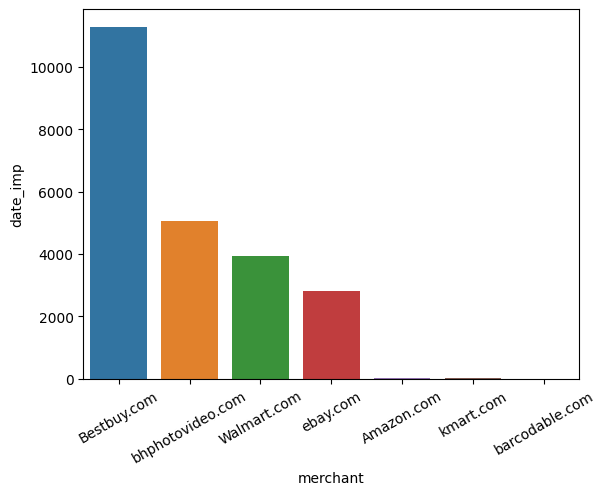

In [14]:
aux1 = df2[['date_imp', 'merchant']].groupby('merchant').count().reset_index().sort_values('date_imp', ascending=False)
plt.xticks(rotation=30)
sns.barplot( data=aux1, x='merchant', y='date_imp' );

## 2.2 Qual a categoria mais vendida?

### 2.2.1 Categoria mais vendida no geral

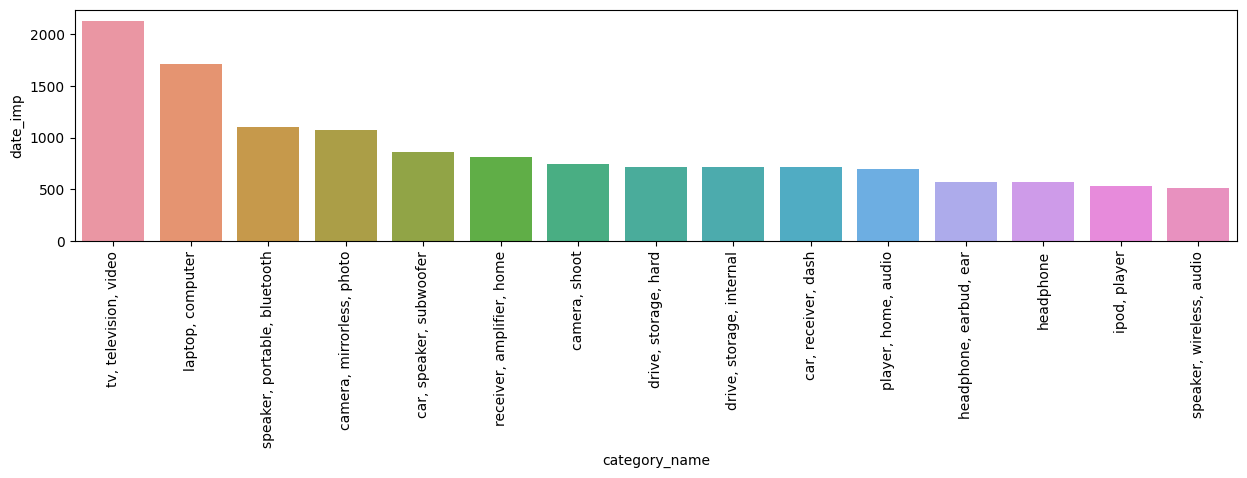

In [15]:
plt.figure(figsize=(15,3))
aux1 = df2[['date_imp', 'category_name']].groupby('category_name').count().reset_index().sort_values('date_imp', ascending=False)
plt.xticks(rotation=90)
sns.barplot( data=aux1.head(15), x='category_name', y='date_imp' );

### 2.2.2. Categoria mais vendida por loja

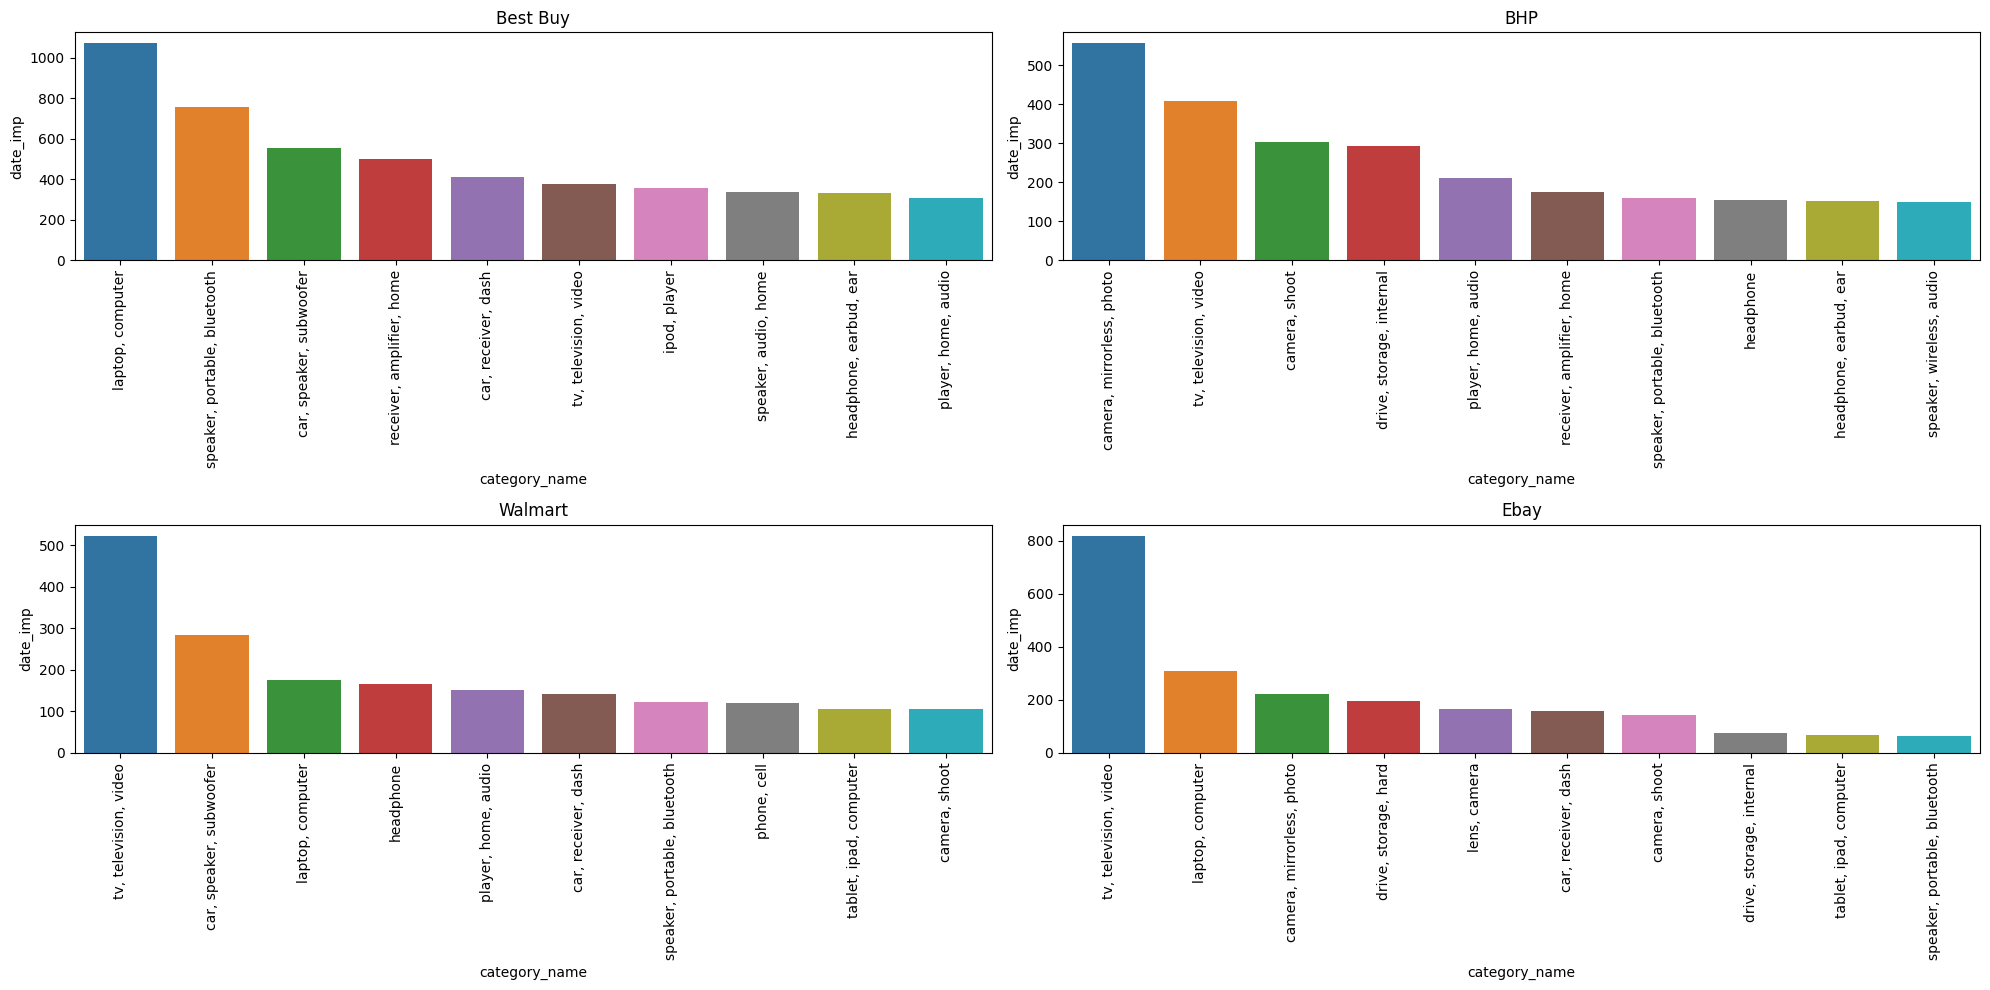

In [16]:
plt.figure(figsize=(20, 10))

plt.subplot(2,2,1)
aux1 = df_bb[['date_imp', 'category_name']].groupby('category_name').count().reset_index().sort_values('date_imp', ascending=False)
plt.xticks(rotation=90)
plt.title('Best Buy')
sns.barplot( data=aux1.head(10), x='category_name', y='date_imp' );

plt.subplot(2,2,2)
aux2 = df_bhp[['date_imp', 'category_name']].groupby('category_name').count().reset_index().sort_values('date_imp', ascending=False)
plt.xticks(rotation=90)
plt.title('BHP')
sns.barplot( data=aux2.head(10), x='category_name', y='date_imp' );

plt.subplot(2,2,3)
aux3 = df_walmart[['date_imp', 'category_name']].groupby('category_name').count().reset_index().sort_values('date_imp', ascending=False)
plt.xticks(rotation=90)
plt.title('Walmart')
sns.barplot( data=aux3.head(10), x='category_name', y='date_imp' );

plt.subplot(2,2,4)
aux4 = df_ebay[['date_imp', 'category_name']].groupby('category_name').count().reset_index().sort_values('date_imp', ascending=False)
plt.xticks(rotation=90)
plt.title('Ebay')
sns.barplot( data=aux4.head(10), x='category_name', y='date_imp' );

plt.tight_layout()

## 2.3 Qual é a marca mais vendida?

### 2.3.1 No Geral

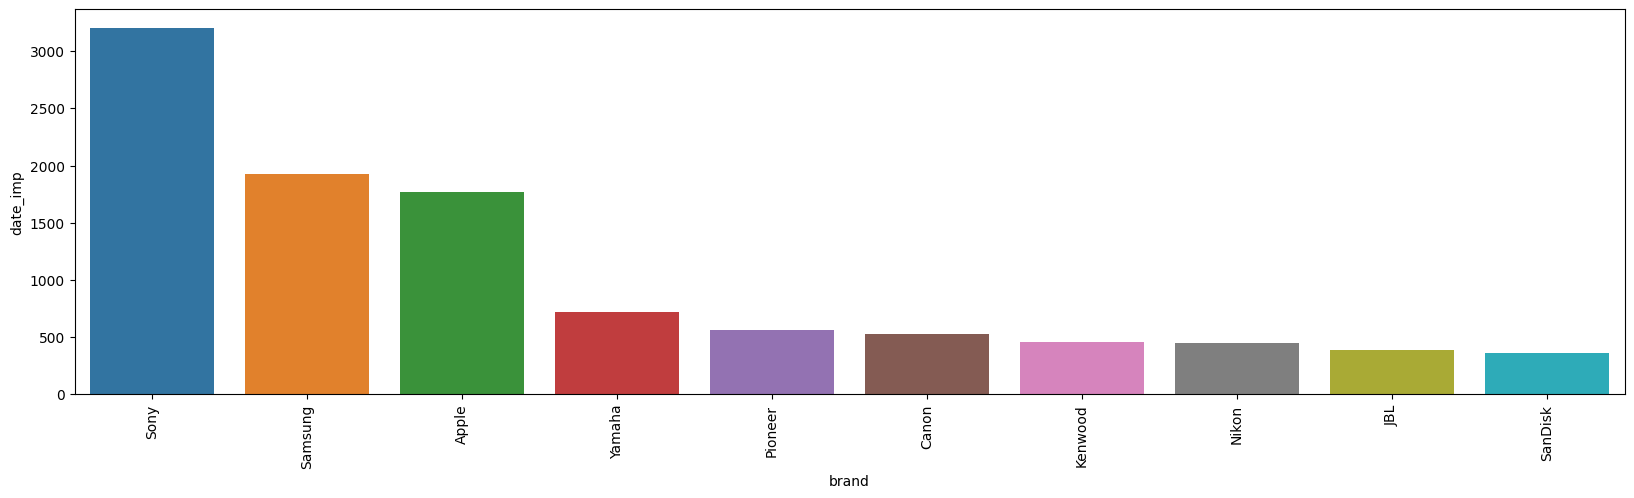

In [17]:
plt.figure(figsize=(20,5))
aux1 = df2[['date_imp', 'brand']].groupby('brand').count().reset_index().sort_values('date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=10)
sns.barplot( data=aux1.head(10), x='brand', y='date_imp' );

### 2.3.2 Por loja

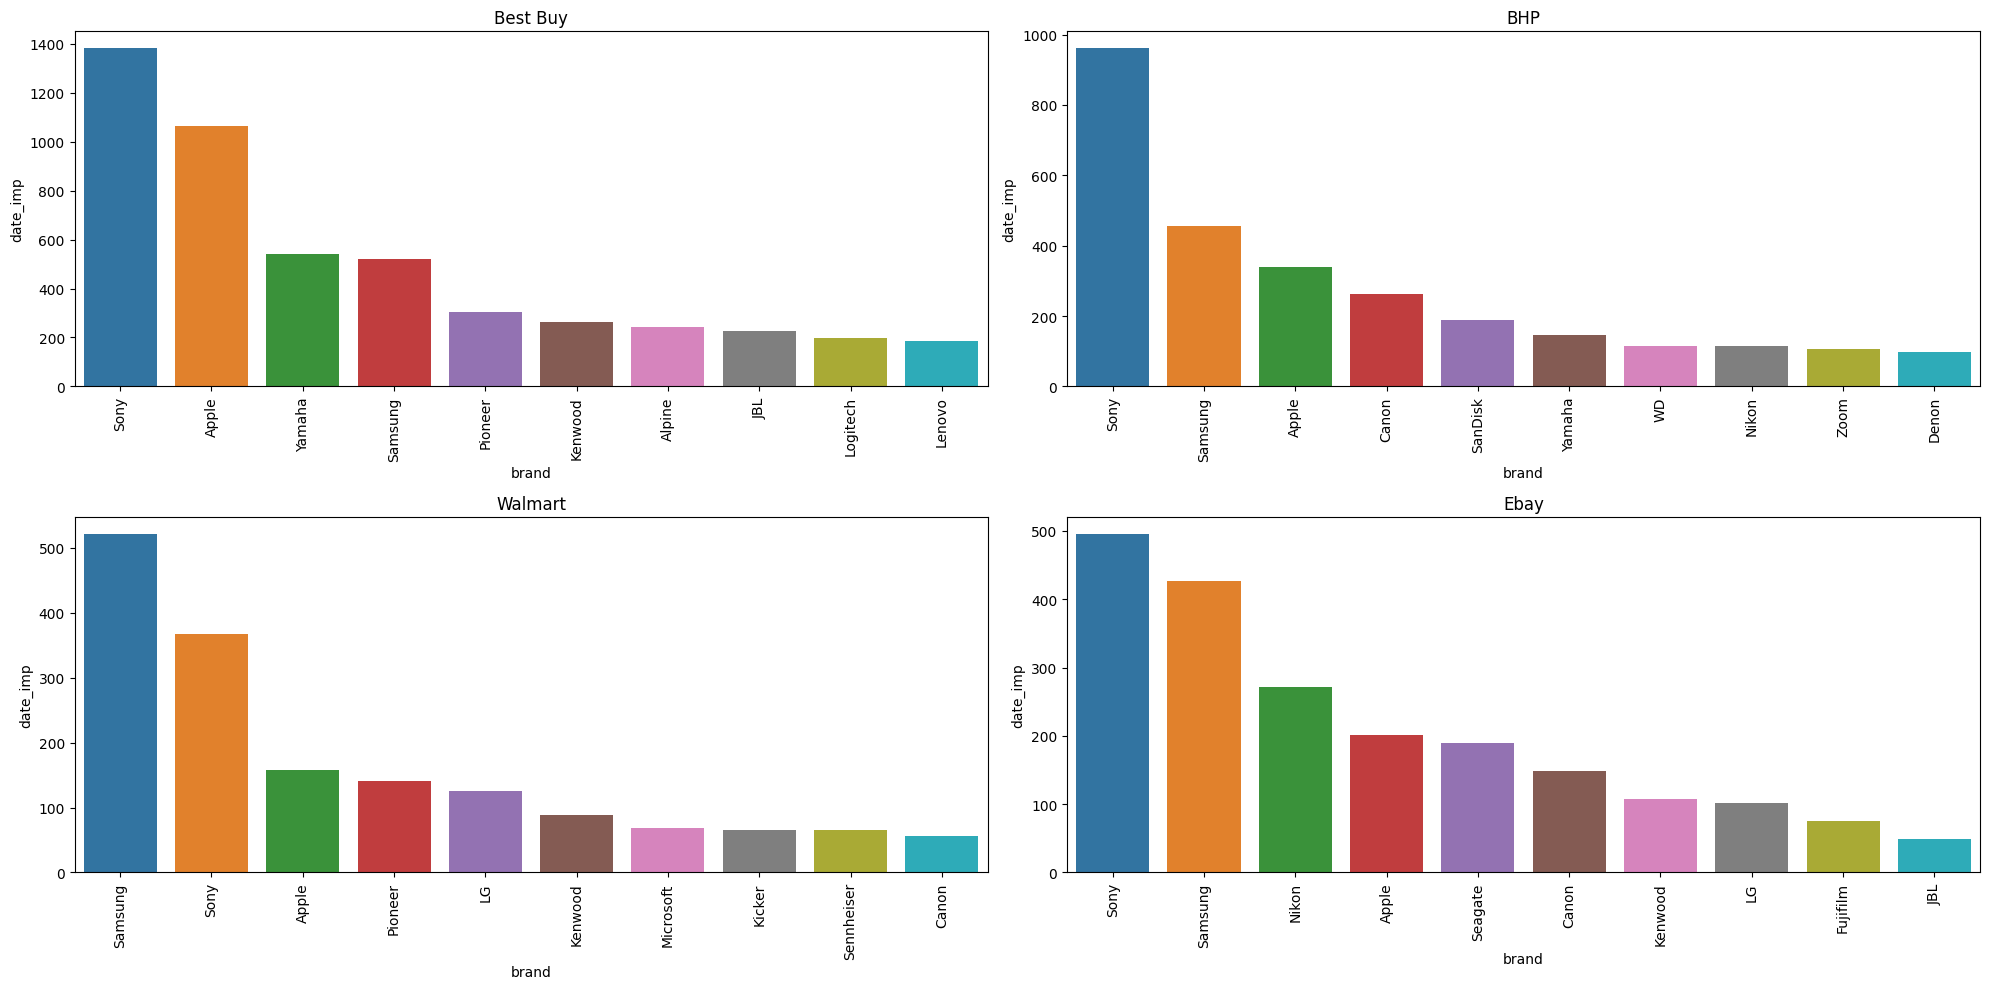

In [18]:
plt.figure(figsize=(20, 10))

plt.subplot(2,2,1)
aux1 = df_bb[['date_imp', 'brand']].groupby('brand').count().reset_index().sort_values('date_imp', ascending=False)
plt.xticks(rotation=90)
plt.title('Best Buy')
sns.barplot( data=aux1.head(10), x='brand', y='date_imp' );

plt.subplot(2,2,2)
aux2 = df_bhp[['date_imp', 'brand']].groupby('brand').count().reset_index().sort_values('date_imp', ascending=False)
plt.xticks(rotation=90)
plt.title('BHP')
sns.barplot( data=aux2.head(10), x='brand', y='date_imp' );

plt.subplot(2,2,3)
aux3 = df_walmart[['date_imp', 'brand']].groupby('brand').count().reset_index().sort_values('date_imp', ascending=False)
plt.xticks(rotation=90)
plt.title('Walmart')
sns.barplot( data=aux3.head(10), x='brand', y='date_imp' );

plt.subplot(2,2,4)
aux4 = df_ebay[['date_imp', 'brand']].groupby('brand').count().reset_index().sort_values('date_imp', ascending=False)
plt.xticks(rotation=90)
plt.title('Ebay')
sns.barplot( data=aux4.head(10), x='brand', y='date_imp' );

plt.tight_layout()

## 2.4 Quais os dias que mais vendem?

### 2.4.1 No Geral

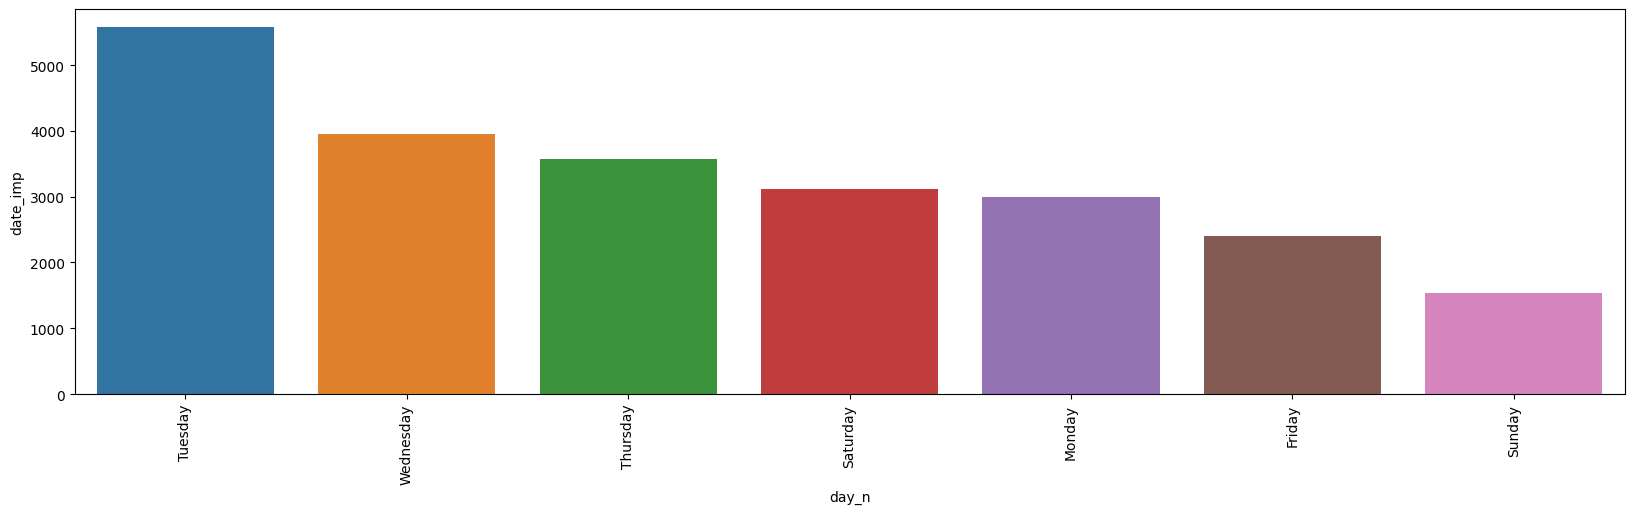

In [19]:
plt.figure(figsize=(20,5))
aux1 = df2[['date_imp', 'day_n']].groupby('day_n').count().reset_index().sort_values('date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=10)
sns.barplot( data=aux1, x='day_n', y='date_imp' );

### 2.4.2 Por Loja

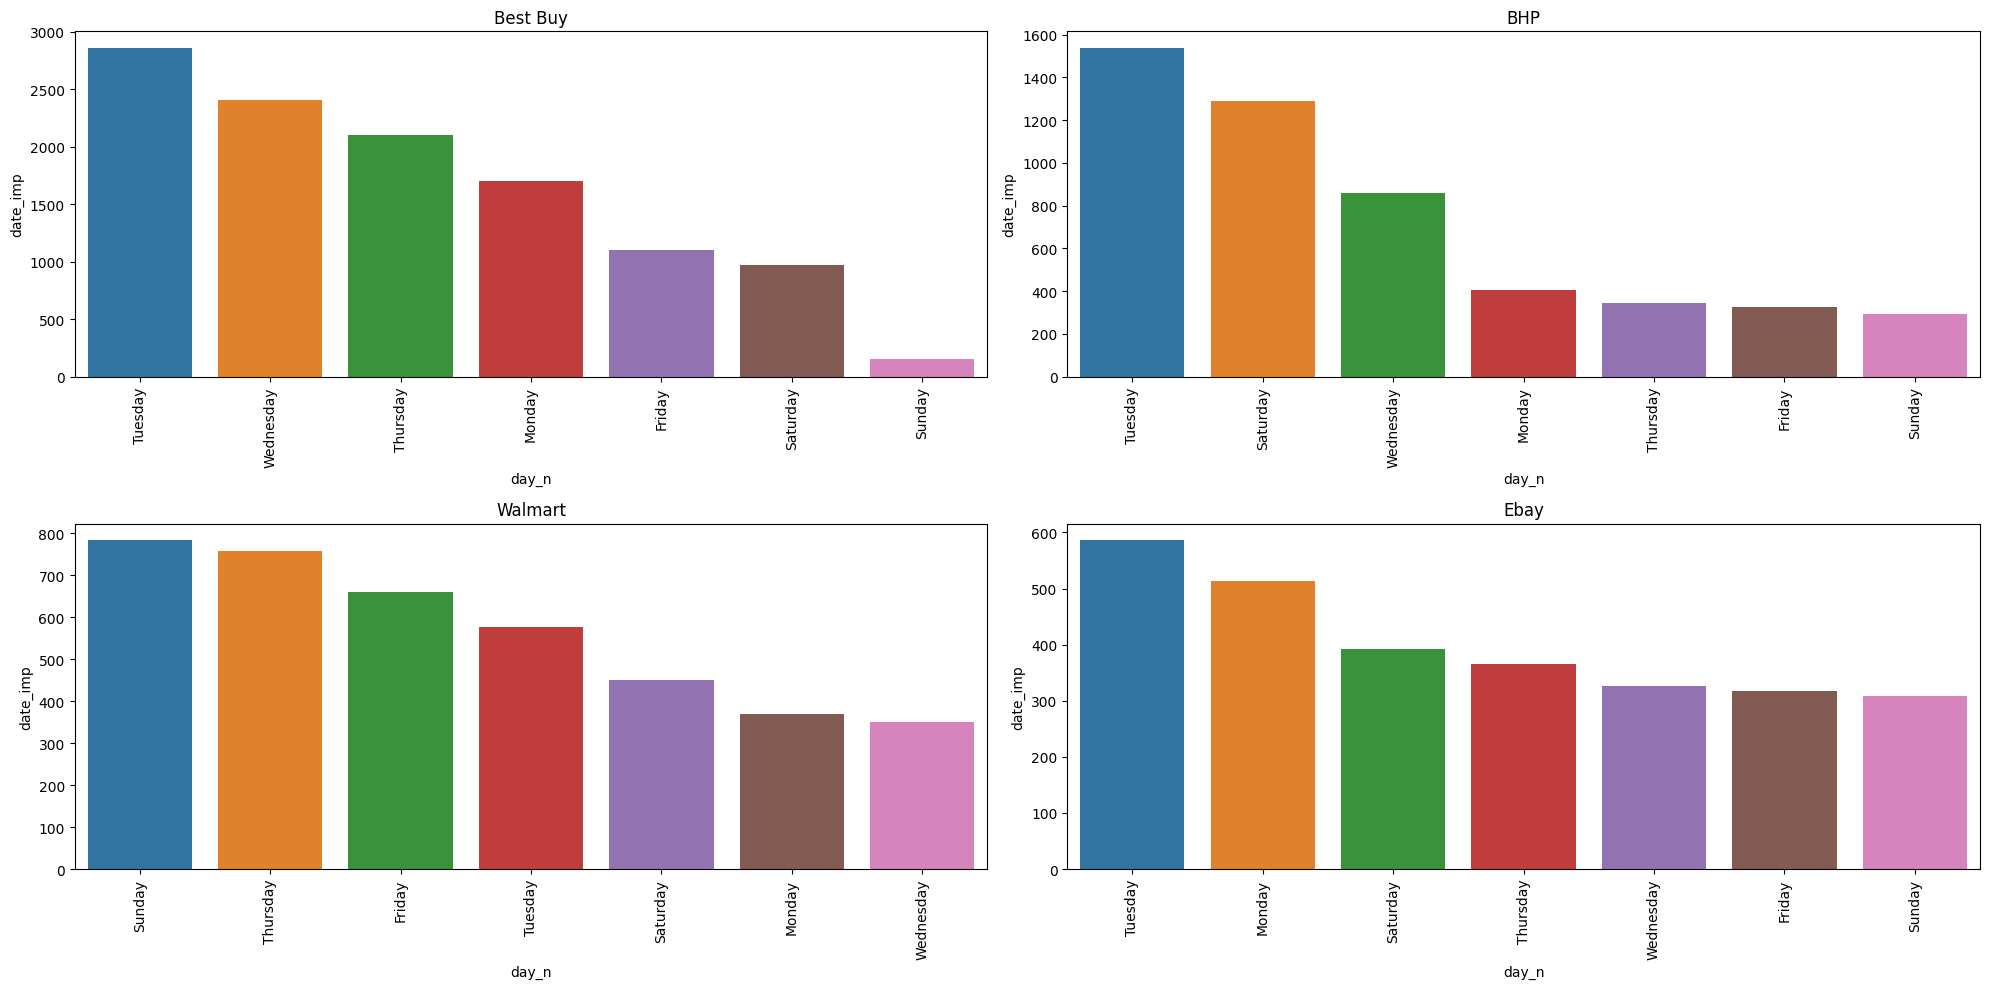

In [20]:
plt.figure(figsize=(20, 10))

plt.subplot(2,2,1)
aux1 = df_bb[['date_imp', 'day_n']].groupby('day_n').count().reset_index().sort_values('date_imp', ascending=False)
plt.xticks(rotation=90)
plt.title('Best Buy')
sns.barplot( data=aux1.head(10), x='day_n', y='date_imp' );

plt.subplot(2,2,2)
aux2 = df_bhp[['date_imp', 'day_n']].groupby('day_n').count().reset_index().sort_values('date_imp', ascending=False)
plt.xticks(rotation=90)
plt.title('BHP')
sns.barplot( data=aux2.head(10), x='day_n', y='date_imp' );

plt.subplot(2,2,3)
aux3 = df_walmart[['date_imp', 'day_n']].groupby('day_n').count().reset_index().sort_values('date_imp', ascending=False)
plt.xticks(rotation=90)
plt.title('Walmart')
sns.barplot( data=aux3.head(10), x='day_n', y='date_imp' );

plt.subplot(2,2,4)
aux4 = df_ebay[['date_imp', 'day_n']].groupby('day_n').count().reset_index().sort_values('date_imp', ascending=False)
plt.xticks(rotation=90)
plt.title('Ebay')
sns.barplot( data=aux4.head(10), x='day_n', y='date_imp' );

plt.tight_layout()

## 2.5 Quais meses mais vendem?

### 2.5.1 No Geral

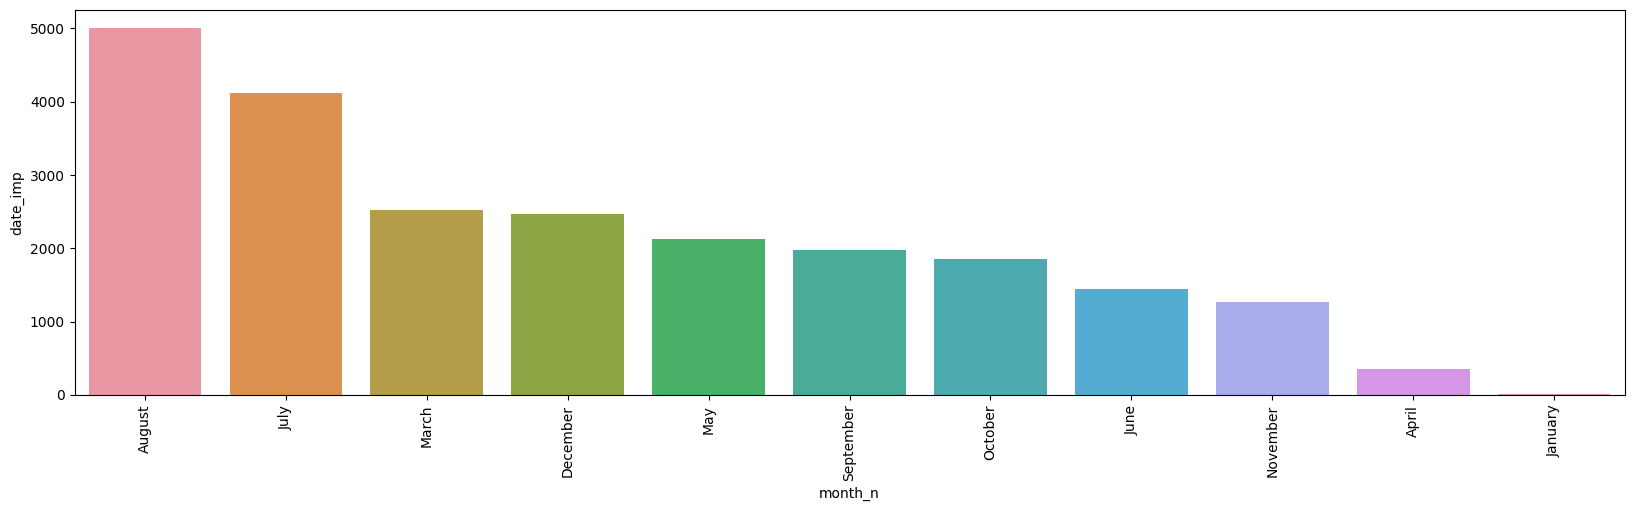

In [21]:
plt.figure(figsize=(20,5))
aux1 = df2[['date_imp', 'month_n']].groupby('month_n').count().reset_index().sort_values('date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=10)
sns.barplot( data=aux1, x='month_n', y='date_imp' );

### 2.5.2 Por Loja

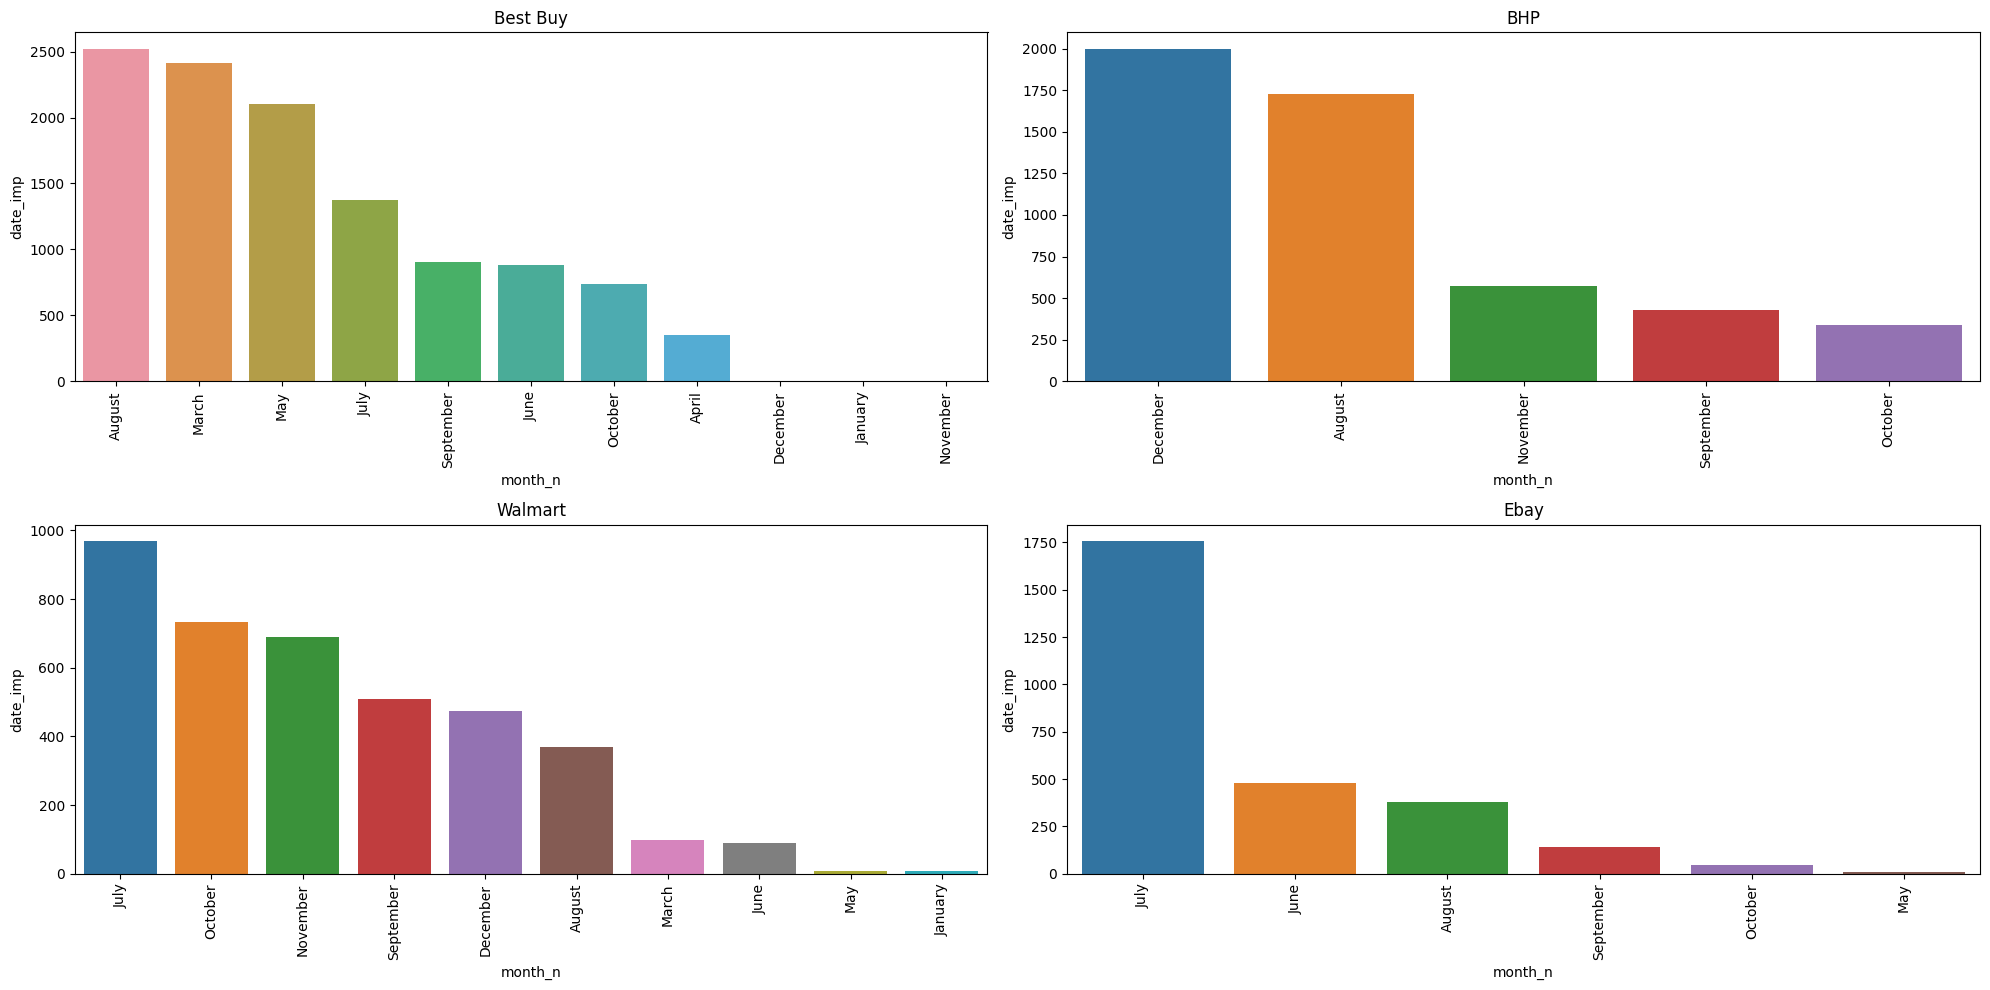

In [22]:
plt.figure(figsize=(20, 10))

plt.subplot(2,2,1)
aux1 = df_bb[['date_imp', 'month_n']].groupby('month_n').count().reset_index().sort_values('date_imp', ascending=False)
plt.xticks(rotation=90)
plt.title('Best Buy')
sns.barplot( data=aux1, x='month_n', y='date_imp' );

plt.subplot(2,2,2)
aux2 = df_bhp[['date_imp', 'month_n']].groupby('month_n').count().reset_index().sort_values('date_imp', ascending=False)
plt.xticks(rotation=90)
plt.title('BHP')
sns.barplot( data=aux2, x='month_n', y='date_imp' );

plt.subplot(2,2,3)
aux3 = df_walmart[['date_imp', 'month_n']].groupby('month_n').count().reset_index().sort_values('date_imp', ascending=False)
plt.xticks(rotation=90)
plt.title('Walmart')
sns.barplot( data=aux3, x='month_n', y='date_imp' );

plt.subplot(2,2,4)
aux4 = df_ebay[['date_imp', 'month_n']].groupby('month_n').count().reset_index().sort_values('date_imp', ascending=False)
plt.xticks(rotation=90)
plt.title('Ebay')
sns.barplot( data=aux4, x='month_n', y='date_imp' );

plt.tight_layout()

## 2.6 Quais semanas mais vendem?

### 2.6.1 No Geral

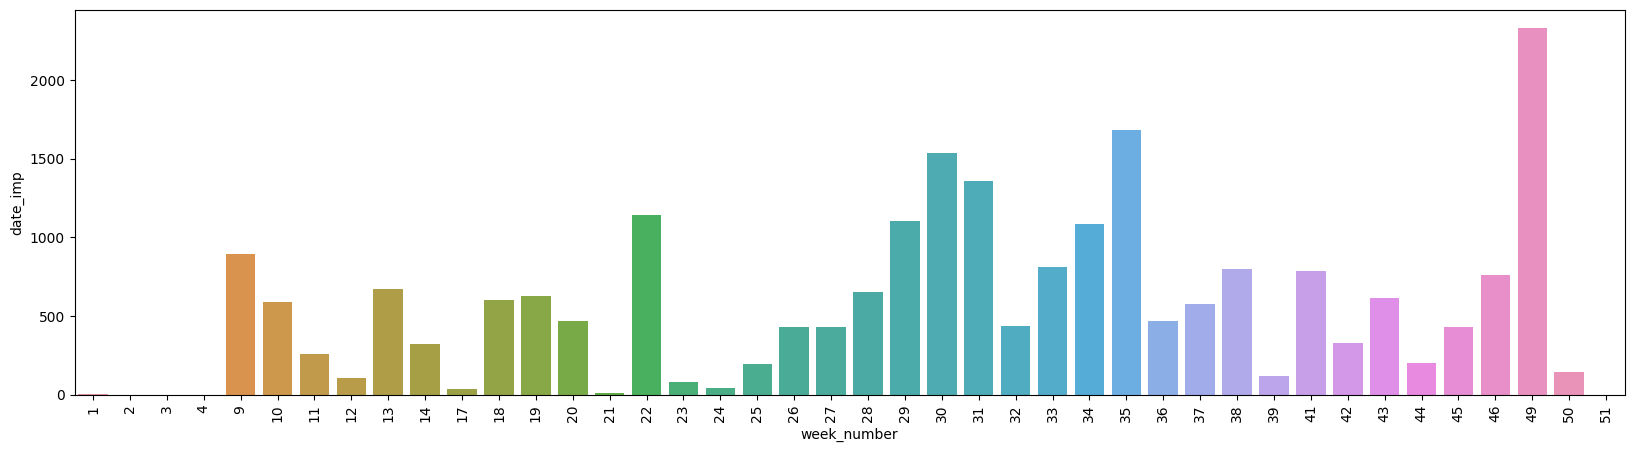

In [23]:
plt.figure(figsize=(20,5))
aux1 = df2[['date_imp', 'week_number']].groupby('week_number').count().reset_index().sort_values('date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=10)
sns.barplot( data=aux1, x='week_number', y='date_imp' );

### 2.6.2 Por Loja

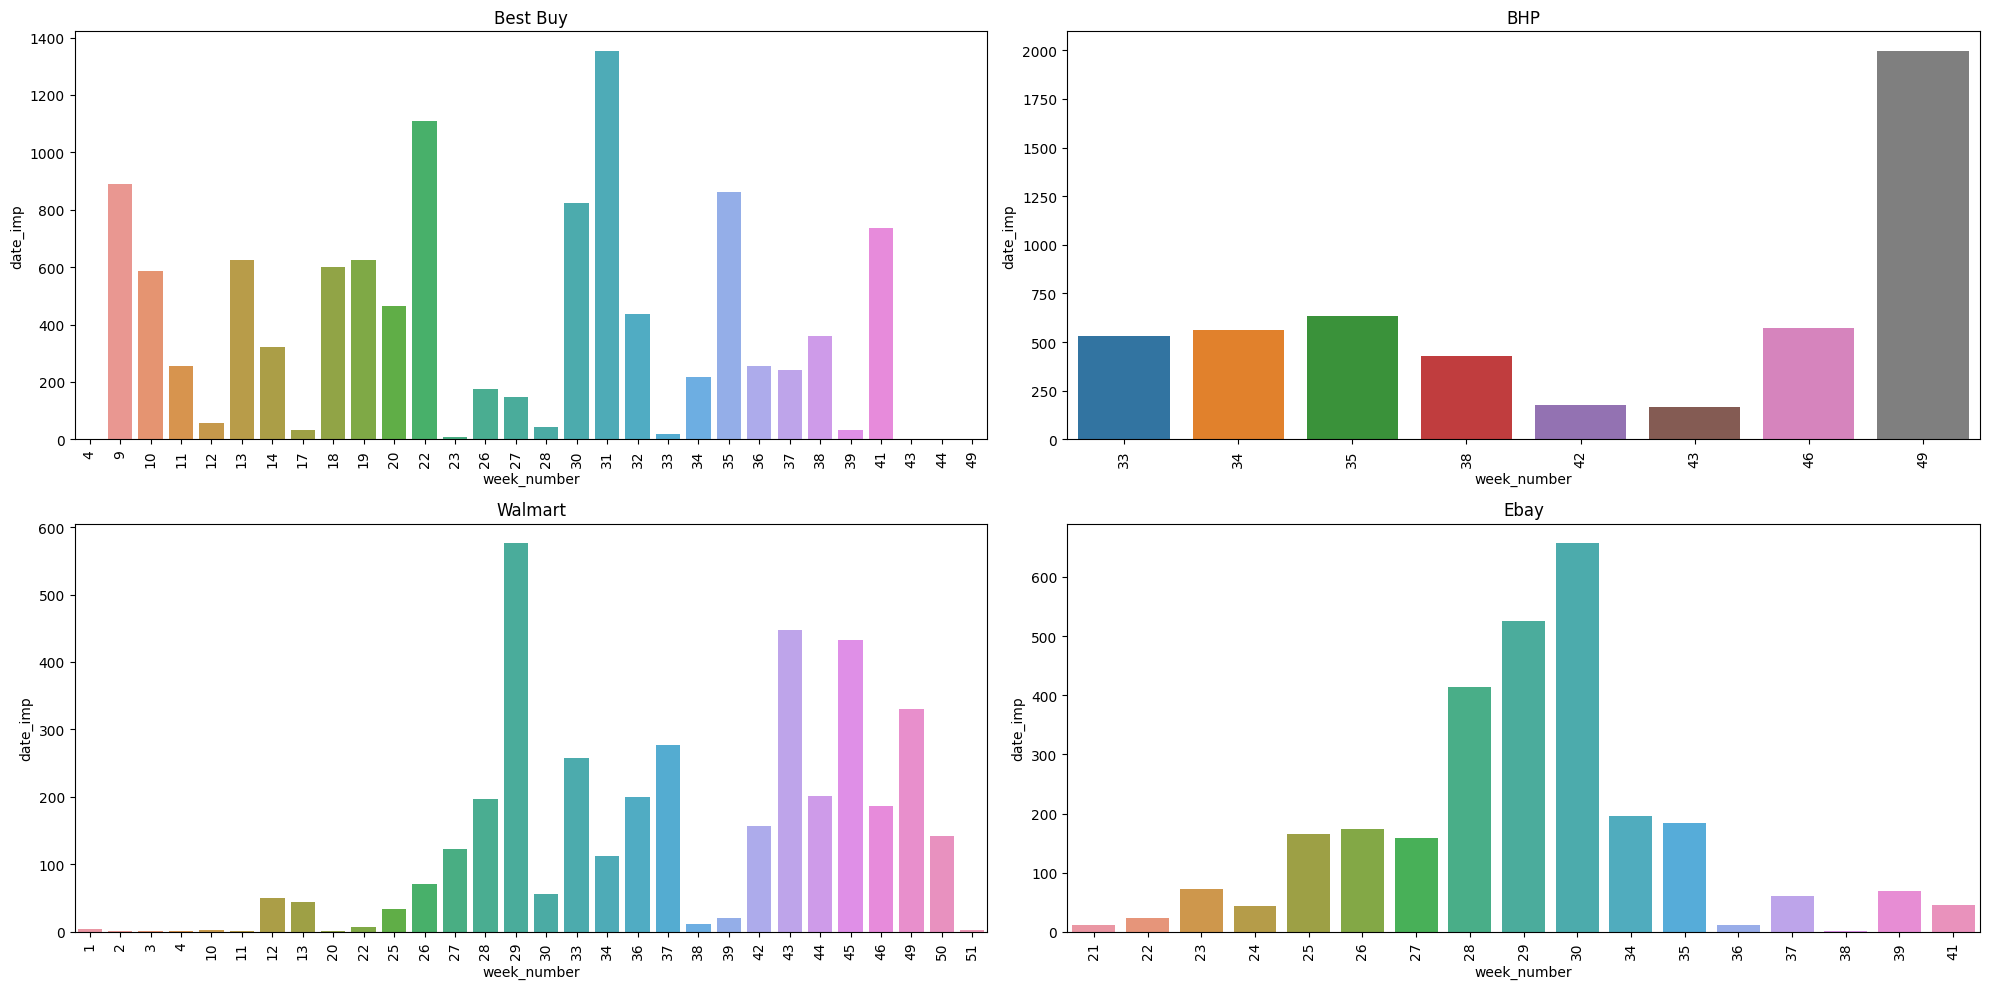

In [24]:
plt.figure(figsize=(20, 10))

plt.subplot(2,2,1)
aux1 = df_bb[['date_imp', 'week_number']].groupby('week_number').count().reset_index().sort_values('date_imp', ascending=False)
plt.xticks(rotation=90)
plt.title('Best Buy')
sns.barplot( data=aux1, x='week_number', y='date_imp' );

plt.subplot(2,2,2)
aux2 = df_bhp[['date_imp', 'week_number']].groupby('week_number').count().reset_index().sort_values('date_imp', ascending=False)
plt.xticks(rotation=90)
plt.title('BHP')
sns.barplot( data=aux2, x='week_number', y='date_imp' );

plt.subplot(2,2,3)
aux3 = df_walmart[['date_imp', 'week_number']].groupby('week_number').count().reset_index().sort_values('date_imp', ascending=False)
plt.xticks(rotation=90)
plt.title('Walmart')
sns.barplot( data=aux3, x='week_number', y='date_imp' );

plt.subplot(2,2,4)
aux4 = df_ebay[['date_imp', 'week_number']].groupby('week_number').count().reset_index().sort_values('date_imp', ascending=False)
plt.xticks(rotation=90)
plt.title('Ebay')
sns.barplot( data=aux4, x='week_number', y='date_imp' );

plt.tight_layout()

# 3.0 Feature Engineering

In [25]:
df3 = df2.copy()

## 3.1. Categoria mais vendida da BestBuy

In [26]:
# Pegando a categoria mais vendida da loja mais vendida
df_best = df_bb.loc[( df_bb['category_name'] == 'laptop, computer'), :]

In [27]:
# Calculando a média de preço por semana e a demanda
df_test = df_best.groupby(['name', 'week_number']).agg({ 'disc_price': 'mean', 'date_imp': 'count' }).reset_index()

# Pivotando o DataFrame
x_price = df_test.pivot( index='week_number', columns='name', values='disc_price' )
x_price = pd.DataFrame(x_price.to_records())
y_demand = df_test.pivot( index='week_number', columns='name', values='date_imp' )
y_demand = pd.DataFrame(y_demand.to_records())

# 4.0 Descrição dos Dados

## 4.1. Data Shape

In [28]:
print(f'Number of Rows on Price: {x_price.shape[0]}')
print(f'Number of Columns on Price: {x_price.shape[1]}')

print(f'Number of Rows n Demand: {y_demand.shape[0]}')
print(f'Number of Columns on Demand: {y_demand.shape[1]}')

Number of Rows on Price: 26
Number of Columns on Price: 40
Number of Rows n Demand: 26
Number of Columns on Demand: 40


## 4.2. Check NA

In [29]:
print(x_price.isna().sum().sum())
print(y_demand.isna().sum().sum())

555
555


## 4.3. Replace NA

In [30]:
# Substituindo os preços das semanas que não venderam pela mediana
a = np.round( x_price.median(), 2)
x_price.fillna( a, inplace=True )

# Substituindo a demanda de quando não vendeu por 0
y_demand.fillna( 0, inplace=True )

## 4.4. Statistics Descriptive

### 4.4.1 Statistics for Price

In [31]:
# Central Tendency - mean, median

ct1 = pd.DataFrame( x_price.apply( np.mean ) ).T
ct2 = pd.DataFrame( x_price.apply( np.median ) ).T

# Dispersion - std, min, max, range, skew, kurtosis

d1 = pd.DataFrame( x_price.apply( np.std ) ).T
d2 = pd.DataFrame( x_price.apply( min ) ).T
d3 = pd.DataFrame( x_price.apply( max ) ).T
d4 = pd.DataFrame( x_price.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( x_price.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( x_price.apply( lambda x: x.kurtosis() ) ).T

# Concat
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,week_number,4.000,49.00,45.000,27.076923,29.00,11.945141,-0.186167,-0.905369
1,"12 MacBook (Mid 2017, Gold)",1454.990,1599.99,145.000,1547.124615,1551.99,25.648346,-2.457686,8.310054
2,"12 MacBook (Mid 2017, Silver)",1234.990,1299.99,65.000,1295.990000,1299.99,14.317821,-3.735032,13.784949
3,12.3 32GB Multi-Touch 2-in-1 Chromebook Plus,372.995,449.00,76.005,413.189808,415.50,15.423120,-1.054924,2.830858
4,"13.3 MacBook Air (Mid 2017, Silver)",911.990,969.99,58.000,949.297692,949.99,8.393080,-2.975611,16.702015
5,"15.4 MacBook Pro with Touch Bar (Late 2016, Si...",2327.990,2799.99,472.000,2607.393846,2618.99,112.833610,-1.131897,2.049122
6,"15.4 MacBook Pro with Touch Bar (Late 2016, Sp...",2023.990,2599.99,576.000,2346.913077,2353.99,122.523757,-0.274833,1.347179
7,ASUS VivoBook Max X541SA 15.6Inch Laptop Intel...,237.490,313.49,76.000,299.720769,304.99,16.347918,-2.916993,8.218479
8,Acer - 2-in-1 15.6 Refurbished Touch-Screen La...,764.990,899.99,135.000,834.028462,829.99,27.804926,0.937281,2.943939
9,Acer 15.6 Chromebook CB5-571-C4G4,199.990,249.00,49.010,242.479231,249.00,14.017001,-2.306458,4.514429


### 4.4.2. Statistics for Demand

In [32]:
# Central Tendency - mean, median

ct1 = pd.DataFrame( y_demand.apply( np.mean ) ).T
ct2 = pd.DataFrame( y_demand.apply( np.median ) ).T

# Dispersion - std, min, max, range, skew, kurtosis

d1 = pd.DataFrame( y_demand.apply( np.std ) ).T
d2 = pd.DataFrame( y_demand.apply( min ) ).T
d3 = pd.DataFrame( y_demand.apply( max ) ).T
d4 = pd.DataFrame( y_demand.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( y_demand.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( y_demand.apply( lambda x: x.kurtosis() ) ).T

# Concat
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,week_number,4.0,49.0,45.0,27.076923,29.0,11.945141,-0.186167,-0.905369
1,"12 MacBook (Mid 2017, Gold)",0.0,8.0,8.0,0.961538,0.0,1.764626,2.738840,9.024976
2,"12 MacBook (Mid 2017, Silver)",0.0,2.0,2.0,0.384615,0.0,0.624926,1.474017,1.189701
3,12.3 32GB Multi-Touch 2-in-1 Chromebook Plus,0.0,4.0,4.0,1.038462,0.5,1.125945,0.606680,-0.428079
4,"13.3 MacBook Air (Mid 2017, Silver)",0.0,2.0,2.0,0.384615,0.0,0.788227,1.658711,0.807453
5,"15.4 MacBook Pro with Touch Bar (Late 2016, Si...",0.0,6.0,6.0,1.153846,0.0,1.609881,1.437577,1.673167
6,"15.4 MacBook Pro with Touch Bar (Late 2016, Sp...",0.0,12.0,12.0,3.230769,1.0,3.885948,0.951022,-0.225438
7,ASUS VivoBook Max X541SA 15.6Inch Laptop Intel...,0.0,2.0,2.0,0.538462,0.0,0.887120,1.105353,-0.849951
8,Acer - 2-in-1 15.6 Refurbished Touch-Screen La...,0.0,2.0,2.0,0.384615,0.0,0.624926,1.474017,1.189701
9,Acer 15.6 Chromebook CB5-571-C4G4,0.0,4.0,4.0,0.769231,1.0,0.932643,1.711207,4.066693


# 5.0. Exploratory Data Analysis

## 5.1 Mediana do Preço e Somatório da Demanda de cada produto por semana

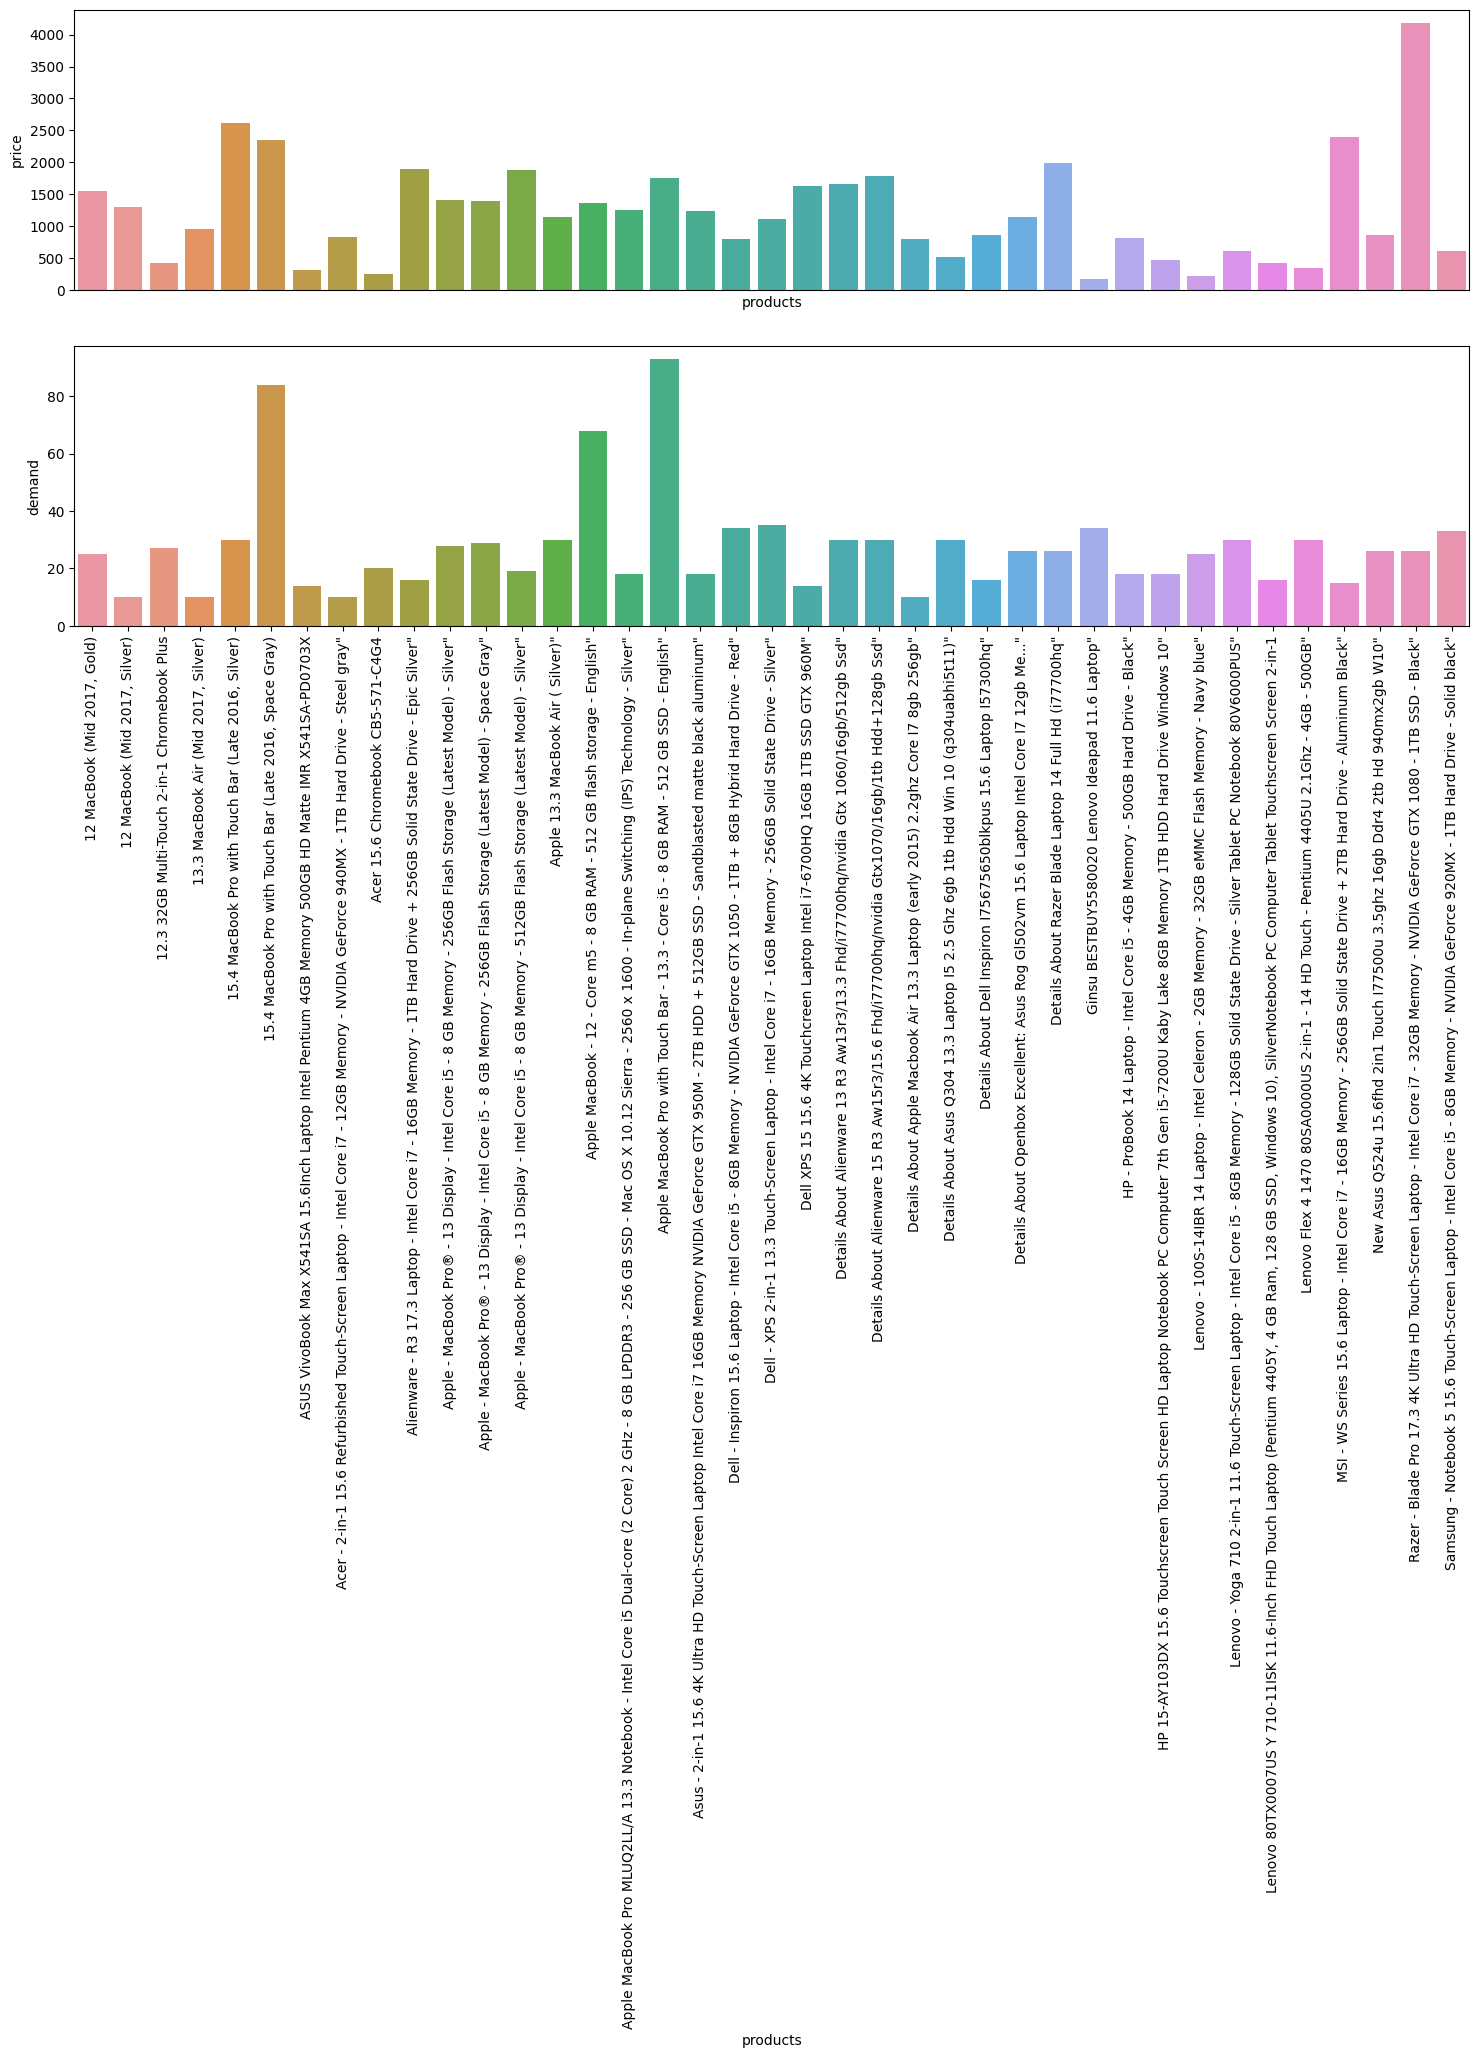

In [33]:
plt.figure(figsize=( 18, 8 ))

aux = x_price.drop(columns=['week_number'])
auz = y_demand.drop(columns=['week_number'])

# Plotando os produtos em relação ao preço mediano
plt.subplot( 2, 1, 1 )
aux1 = pd.DataFrame( aux.apply(lambda x: x.median() ) ).reset_index()
aux1.columns = ['products', 'price']
sns.barplot( data=aux1, x='products', y='price' )
plt.xticks([])

# Plotando os produtos em relação a demanda
plt.subplot( 2, 1, 2 )
aux2 = pd.DataFrame( auz.apply(lambda x: x.sum() ) ).reset_index()
aux2.columns = ['products', 'demand']
plt.xticks(rotation=90)
sns.barplot( data=aux2, x='products', y='demand' );

## 5.2. Variação de preço e demanda de cada produto por semana

### 5.2.0 List of Products

In [34]:
a = ['12 MacBook (Mid 2017, Gold)', '12 MacBook (Mid 2017, Silver)',
       '12.3 32GB Multi-Touch 2-in-1 Chromebook Plus',
       '13.3 MacBook Air (Mid 2017, Silver)',
       '15.4 MacBook Pro with Touch Bar (Late 2016, Silver)',
       '15.4 MacBook Pro with Touch Bar (Late 2016, Space Gray)',
       'ASUS VivoBook Max X541SA 15.6Inch Laptop Intel Pentium 4GB Memory 500GB HD Matte IMR X541SA-PD0703X',
       'Acer - 2-in-1 15.6 Refurbished Touch-Screen Laptop - Intel Core i7 - 12GB Memory - NVIDIA GeForce 940MX - 1TB Hard Drive - Steel gray"',
       'Acer 15.6 Chromebook CB5-571-C4G4',
       'Alienware - R3 17.3 Laptop - Intel Core i7 - 16GB Memory - 1TB Hard Drive + 256GB Solid State Drive - Epic Silver"',
       'Apple - MacBook Pro® - 13 Display - Intel Core i5 - 8 GB Memory - 256GB Flash Storage (Latest Model) - Silver"',
       'Apple - MacBook Pro® - 13 Display - Intel Core i5 - 8 GB Memory - 256GB Flash Storage (Latest Model) - Space Gray"',
       'Apple - MacBook Pro® - 13 Display - Intel Core i5 - 8 GB Memory - 512GB Flash Storage (Latest Model) - Silver"',
       'Apple 13.3 MacBook Air ( Silver)"',
       'Apple MacBook - 12 - Core m5 - 8 GB RAM - 512 GB flash storage - English"',
       'Apple MacBook Pro MLUQ2LL/A 13.3 Notebook - Intel Core i5 Dual-core (2 Core) 2 GHz - 8 GB LPDDR3 - 256 GB SSD - Mac OS X 10.12 Sierra - 2560 x 1600 - In-plane Switching (IPS) Technology - Silver"',
       'Apple MacBook Pro with Touch Bar - 13.3 - Core i5 - 8 GB RAM - 512 GB SSD - English"',
       'Asus - 2-in-1 15.6 4K Ultra HD Touch-Screen Laptop Intel Core i7 16GB Memory NVIDIA GeForce GTX 950M - 2TB HDD + 512GB SSD - Sandblasted matte black aluminum"',
       'Dell - Inspiron 15.6 Laptop - Intel Core i5 - 8GB Memory - NVIDIA GeForce GTX 1050 - 1TB + 8GB Hybrid Hard Drive - Red"',
       'Dell - XPS 2-in-1 13.3 Touch-Screen Laptop - Intel Core i7 - 16GB Memory - 256GB Solid State Drive - Silver"',
       'Dell XPS 15 15.6 4K Touchcreen Laptop Intel i7-6700HQ 16GB 1TB SSD GTX 960M"',
       'Details About Alienware 13 R3 Aw13r3/13.3 Fhd/i77700hq/nvidia Gtx 1060/16gb/512gb Ssd"',
       'Details About Alienware 15 R3 Aw15r3/15.6 Fhd/i77700hq/nvidia Gtx1070/16gb/1tb Hdd+128gb Ssd"',
       'Details About Apple Macbook Air 13.3 Laptop (early 2015) 2.2ghz Core I7 8gb 256gb"',
       'Details About Asus Q304 13.3 Laptop I5 2.5 Ghz 6gb 1tb Hdd Win 10 (q304uabhi5t11)"',
       'Details About Dell Inspiron I75675650blkpus 15.6 Laptop I57300hq"',
       'Details About Openbox Excellent: Asus Rog Gl502vm 15.6 Laptop Intel Core I7 12gb Me..."',
       'Details About Razer Blade Laptop 14 Full Hd (i77700hq"',
       'Ginsu BESTBUY5580020 Lenovo Ideapad 11.6 Laptop"',
       'HP - ProBook 14 Laptop - Intel Core i5 - 4GB Memory - 500GB Hard Drive - Black"',
       'HP 15-AY103DX 15.6 Touchscreen Touch Screen HD Laptop Notebook PC Computer 7th Gen i5-7200U Kaby Lake 8GB Memory 1TB HDD Hard Drive Windows 10"',
       'Lenovo - 100S-14IBR 14 Laptop - Intel Celeron - 2GB Memory - 32GB eMMC Flash Memory - Navy blue"',
       'Lenovo - Yoga 710 2-in-1 11.6 Touch-Screen Laptop - Intel Core i5 - 8GB Memory - 128GB Solid State Drive - Silver Tablet PC Notebook 80V6000PUS"',
       'Lenovo 80TX0007US Y 710-11ISK 11.6-Inch FHD Touch Laptop (Pentium 4405Y, 4 GB Ram, 128 GB SSD, Windows 10), SilverNotebook PC Computer Tablet Touchscreen Screen 2-in-1',
       'Lenovo Flex 4 1470 80SA0000US 2-in-1 - 14 HD Touch - Pentium 4405U 2.1Ghz - 4GB - 500GB"',
       'MSI - WS Series 15.6 Laptop - Intel Core i7 - 16GB Memory - 256GB Solid State Drive + 2TB Hard Drive - Aluminum Black"',
       'New Asus Q524u 15.6fhd 2in1 Touch I77500u 3.5ghz 16gb Ddr4 2tb Hd 940mx2gb W10"',
       'Razer - Blade Pro 17.3 4K Ultra HD Touch-Screen Laptop - Intel Core i7 - 32GB Memory - NVIDIA GeForce GTX 1080 - 1TB SSD - Black"',
       'Samsung - Notebook 5 15.6 Touch-Screen Laptop - Intel Core i5 - 8GB Memory - NVIDIA GeForce 920MX - 1TB Hard Drive - Solid black"']

### 5.2.1 Price by Week

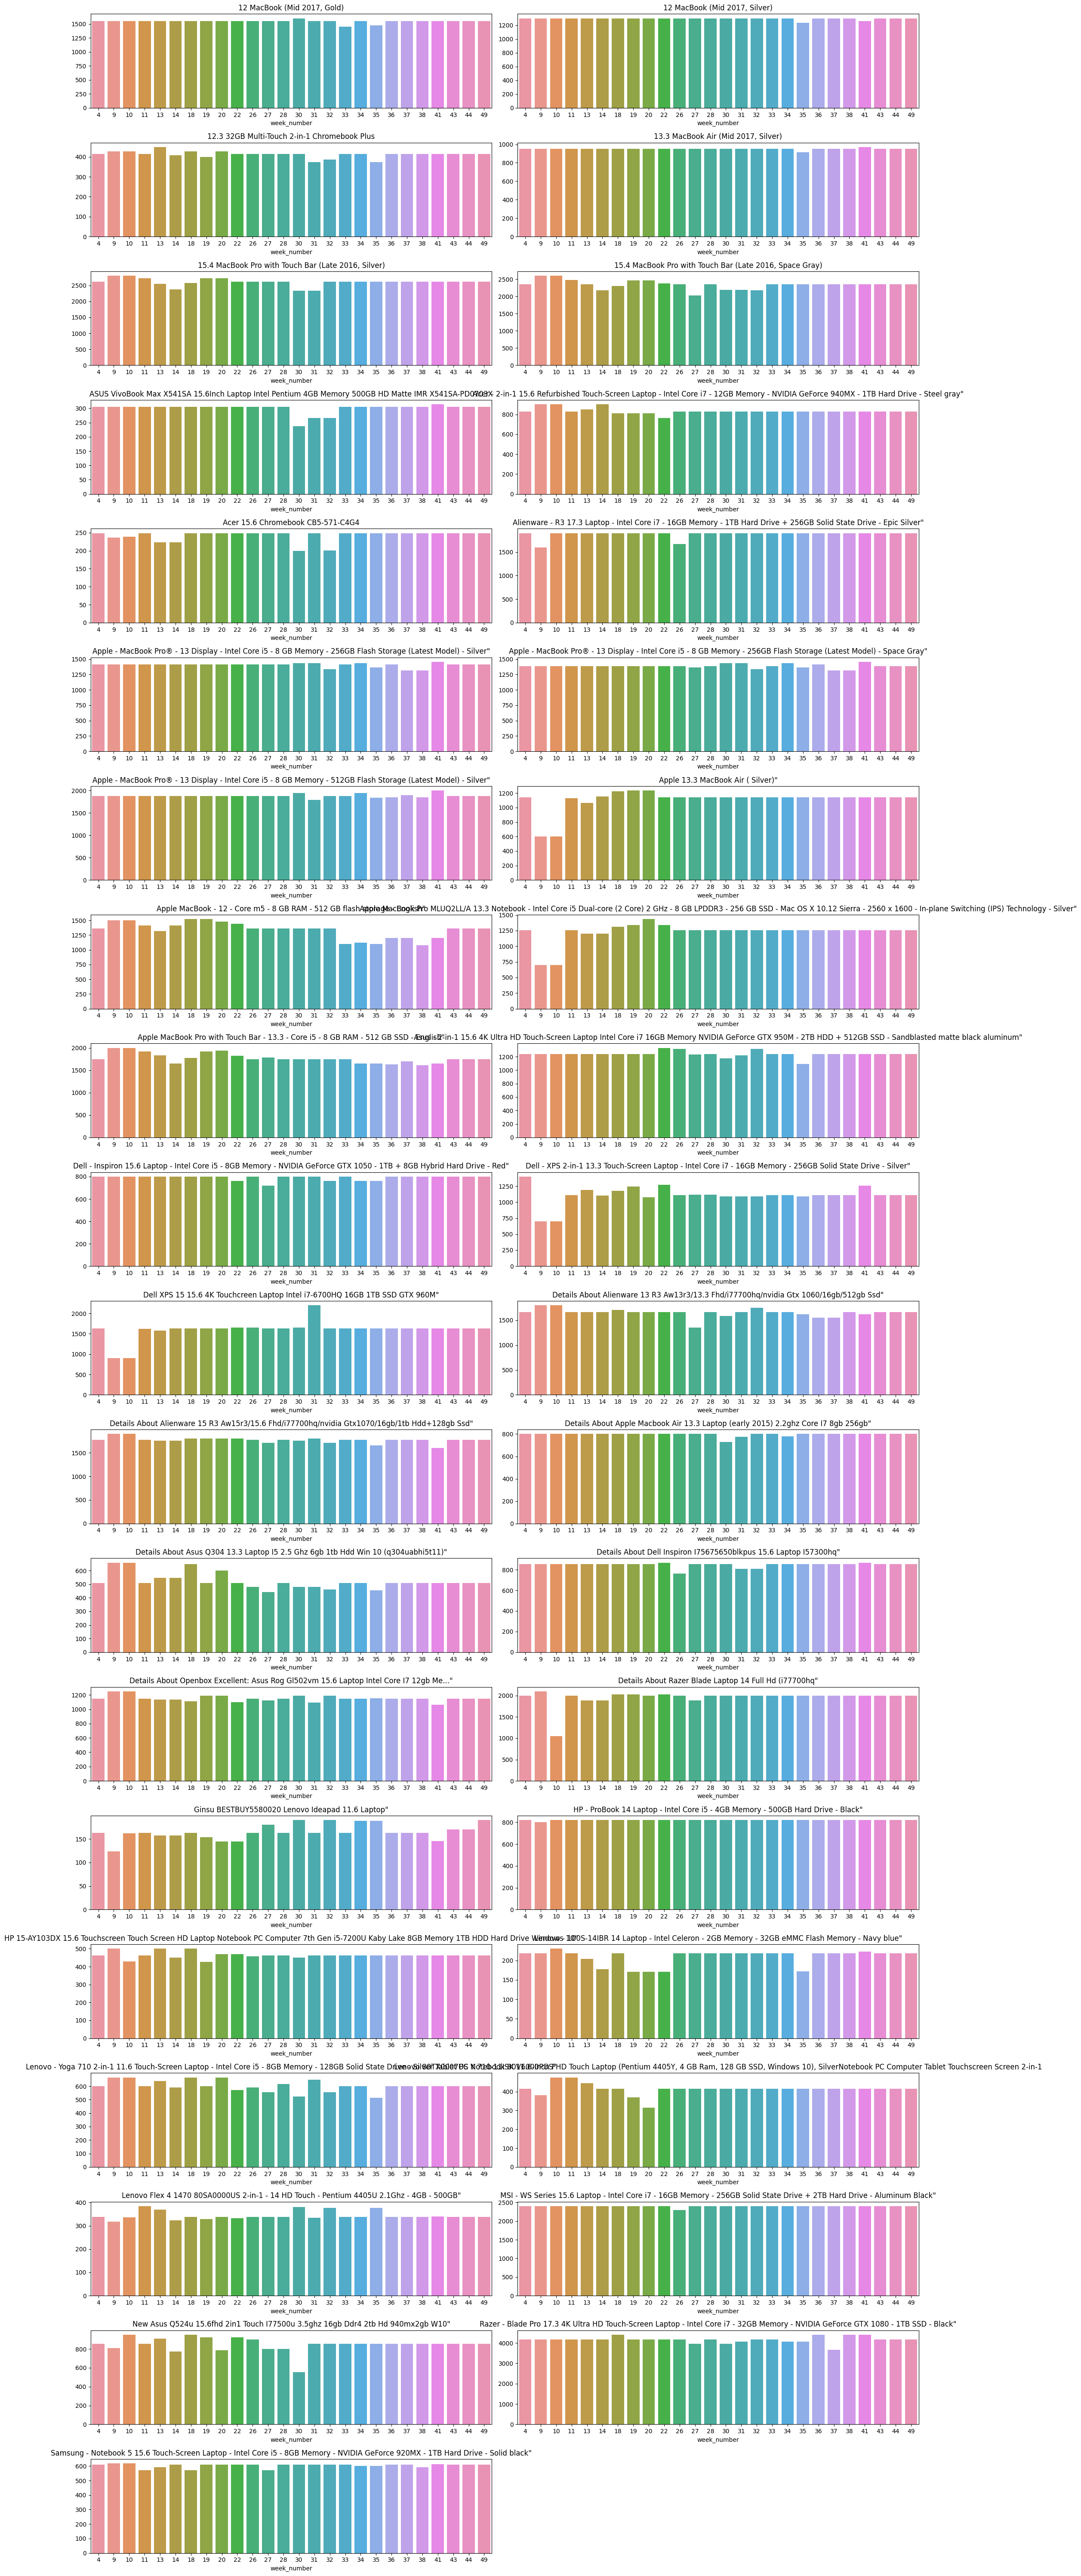

In [35]:
plt.figure(figsize=(20,60))

for k in np.arange(1, len(x_price.columns), 1):
    plt.subplot( 20, 2, k )
    sns.barplot( data=x_price, x='week_number', y=x_price[x_price.columns[k]] )
    plt.title(a[k-1])
    plt.ylabel('')
    plt.tight_layout()

### 5.2.2. Demand by Week

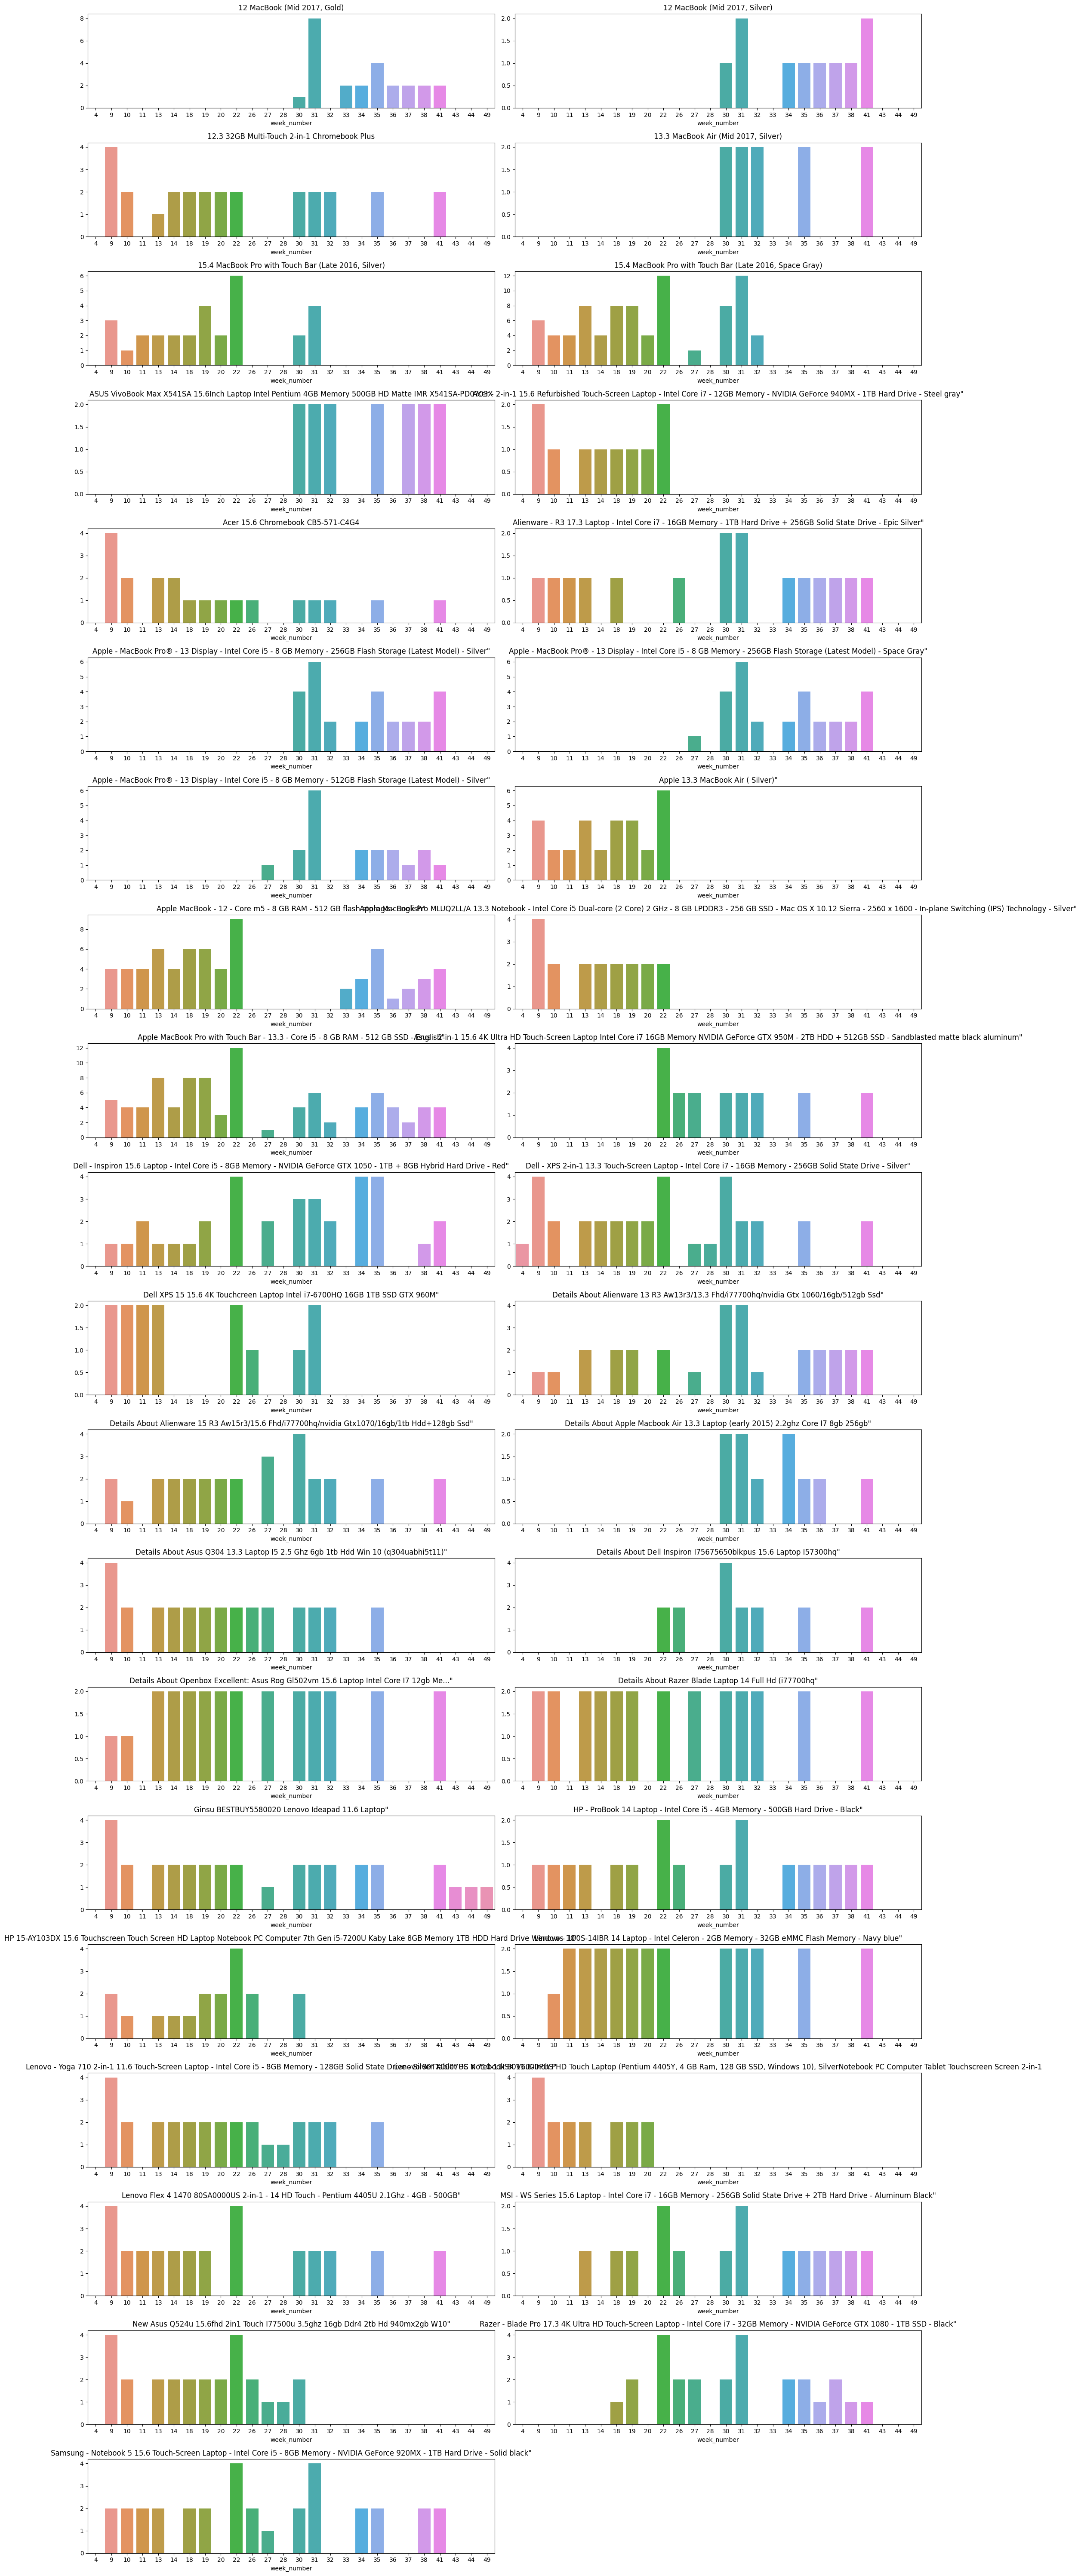

In [36]:
plt.figure(figsize=(20,60))

for k in np.arange(1, len(y_demand.columns), 1):
    plt.subplot( 20, 2, k )
    sns.barplot( data=y_demand, x='week_number', y=y_demand[y_demand.columns[k]] )
    plt.title(a[k-1])
    plt.ylabel('')
    plt.tight_layout()

# 6.0 Machine Learning

## 6.1. MacBook (Mid 2017, Gold)

In [37]:
x_laptop = x_price.loc[:, '12 MacBook (Mid 2017, Gold)']
y_laptop = y_demand.loc[:, '12 MacBook (Mid 2017, Gold)']
X_laptop = sm.add_constant(x_laptop)
model = sm.OLS( y_laptop, X_laptop )
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:     12 MacBook (Mid 2017, Gold)   R-squared:                       0.081
Model:                                     OLS   Adj. R-squared:                  0.042
Method:                          Least Squares   F-statistic:                     2.108
Date:                         Wed, 19 Jul 2023   Prob (F-statistic):              0.159
Time:                                 15:06:54   Log-Likelihood:                -50.564
No. Observations:                           26   AIC:                             105.1
Df Residuals:                               24   BIC:                             107.6
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------

## 6.2. All Columns

In [38]:
results_values = {'name': [],
                  'price_elasticity': [],
                  'price_mean': [],
                  'quantity_mean': [],
                  'intercept': [],
                  'slope': [],
                  'rsquared': [],
                  'pvalue': [],
                  }

for column in x_price.columns[1:]:
    column_points = []
    for i in range(len(x_price[column])):
        column_points.append((x_price[column][i], y_demand[column][i]))
    df = pd.DataFrame( list(column_points), columns=['x_price', 'y_demand'] )

    x_laptop = df['x_price']
    y_laptop = df['y_demand']
    X_laptop = sm.add_constant(x_laptop)
    model = sm.OLS( y_laptop, X_laptop )
    results = model.fit()

    if results.f_pvalue < 0.05:
    
        rsquared = results.rsquared
        pvalue = results.f_pvalue
        intercept, slope = results.params
        mean_price = np.mean(x_laptop)
        mean_quantity = np.mean(y_laptop)
        price_elasticity = slope * (mean_price / mean_quantity)

        results_values['name'].append(column)
        results_values['price_elasticity'].append(price_elasticity)
        results_values['price_mean'].append(mean_price)
        results_values['quantity_mean'].append(mean_quantity)
        results_values['intercept'].append(intercept)
        results_values['slope'].append(slope)
        results_values['rsquared'].append(rsquared)
        results_values['pvalue'].append(pvalue)

        df_results = pd.DataFrame( results_values )

In [39]:
df_results

,name,price_elasticity,price_mean,quantity_mean,intercept,slope,rsquared,pvalue
0,"12 MacBook (Mid 2017, Silver)",-65.115595,1295.990000,0.384615,25.429075,-0.019325,0.196027,0.023508
1,ASUS VivoBook Max X541SA 15.6Inch Laptop Intel...,-16.039643,299.720769,0.538462,9.175192,-0.028816,0.281984,0.005251
2,Acer 15.6 Chromebook CB5-571-C4G4,-8.432545,242.479231,0.769231,7.255804,-0.026751,0.161645,0.041743
3,Apple MacBook Pro MLUQ2LL/A 13.3 Notebook - In...,-6.018642,1224.221154,0.692308,4.859060,-0.003404,0.236464,0.011774
4,Dell - Inspiron 15.6 Laptop - Intel Core i5 - ...,-23.203537,790.759231,1.307692,31.650779,-0.038372,0.327839,0.002237
5,Details About Apple Macbook Air 13.3 Laptop (e...,-68.165723,795.509231,0.384615,26.602201,-0.032957,0.510312,0.000041
6,Lenovo - 100S-14IBR 14 Laptop - Intel Celeron ...,-6.049399,209.663077,0.961538,6.778268,-0.027743,0.277667,0.005677


# 7.0. Elasticidade 

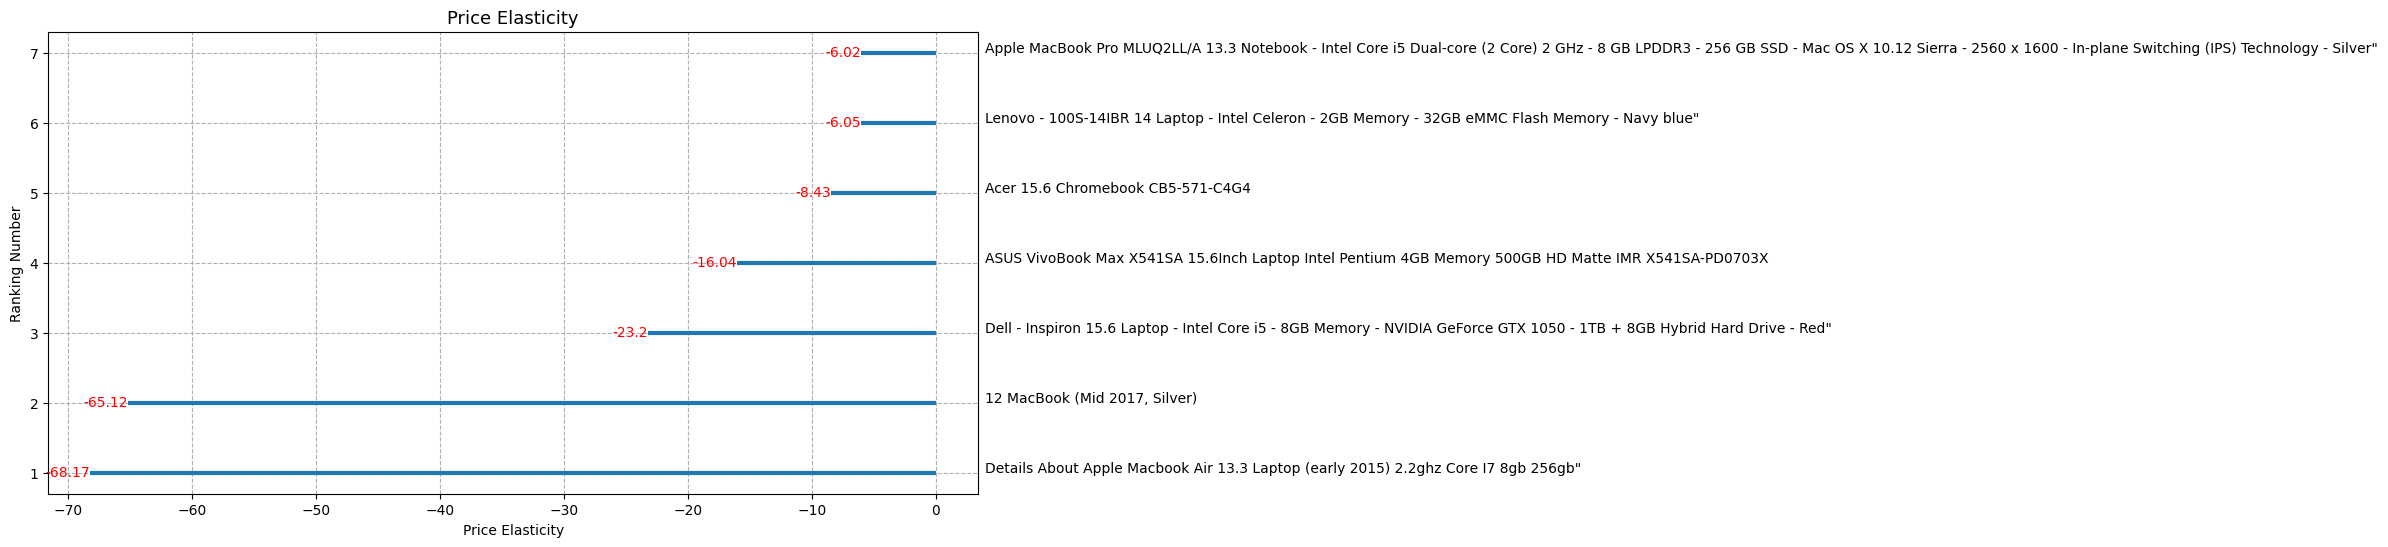

In [55]:
df_results['ranking'] = df_results.loc[ :, 'price_elasticity' ].rank( ascending=True ).astype(int)
df_results = df_results.reset_index(drop=True)

plt.figure(figsize=(12,6));
plt.hlines( y = df_results['ranking'], xmin=0, xmax=df_results['price_elasticity'], alpha=1, linewidth=3 );

for name, p in zip( df_results['name'], df_results['ranking']):
    plt.text(4, p, name)

for x, y, s in zip( df_results['price_elasticity'], df_results['ranking'], df_results['price_elasticity'] ):
    plt.text( x, y, round(s, 2), horizontalalignment='right' if x<0 else 'left',
                                 verticalalignment='center',
                                 fontdict={'color': 'red' if x<0 else 'green', 'size':10})
    
plt.gca().set(ylabel='Ranking Number', xlabel='Price Elasticity')
plt.title('Price Elasticity', fontdict={'size': 13})
plt.grid(linestyle='--')

In [56]:
df_results_order = df_results[['ranking', 'name', 'price_elasticity']].sort_values('price_elasticity', ascending=False)
df_results_order

,ranking,name,price_elasticity
3,7,Apple MacBook Pro MLUQ2LL/A 13.3 Notebook - In...,-6.018642
6,6,Lenovo - 100S-14IBR 14 Laptop - Intel Celeron ...,-6.049399
2,5,Acer 15.6 Chromebook CB5-571-C4G4,-8.432545
1,4,ASUS VivoBook Max X541SA 15.6Inch Laptop Intel...,-16.039643
4,3,Dell - Inspiron 15.6 Laptop - Intel Core i5 - ...,-23.203537
0,2,"12 MacBook (Mid 2017, Silver)",-65.115595
5,1,Details About Apple Macbook Air 13.3 Laptop (e...,-68.165723


In [57]:
df_results_order.to_csv('../data/product_elasticity.csv')

# 8.0 Business Performance

In [42]:
resultado_faturamento = {
        'name': [],
        'faturamento_atual': [],
        'faturamento_redução':[],
        'perda_faturamento':[],
        'faturamento_novo':[],
        'variacao_faturamento':[],
        'variacao_percentual':[]
}

for i in range(len(df_results_order)):
    preco_atual_medio = x_price[df_results_order['name'][i]].mean()
    demanda_atual = y_demand[df_results_order['name'][i]].sum()

    reducao_preco = preco_atual_medio*0.9
    aumento_demanda = -0.1*df_results_order['price_elasticity'][i]

    demanda_nova = aumento_demanda*demanda_atual

    faturamento_atual = round(preco_atual_medio*demanda_atual, 2) # Preço padrão x a demanda padrão
    faturamento_novo = round(reducao_preco*demanda_nova, 2) # Redução do preço(exemplo 10%) * a nova demanda devido a redução (porcentagem de desconto x o coef. price_elasticity)

    faturamento_reducao = round(faturamento_atual*0.9, 2) # Novo faturamento se mantivermos a mesma demanda

    perda_faturamento = round(faturamento_atual-faturamento_reducao, 2) # Risco de perda de faturamento

    variacao_faturamento = round(faturamento_novo-faturamento_atual ,2) # Risco de ganho

    variacao_percentual = round(((faturamento_novo-faturamento_atual)/faturamento_atual)*100,2) # Porentagem de aumento


    resultado_faturamento['name'].append(df_results_order['name'][i])
    resultado_faturamento['faturamento_atual'].append(faturamento_atual)
    resultado_faturamento['faturamento_redução'].append(faturamento_reducao)
    resultado_faturamento['perda_faturamento'].append(perda_faturamento)
    resultado_faturamento['faturamento_novo'].append(faturamento_novo)
    resultado_faturamento['variacao_faturamento'].append(variacao_faturamento)
    resultado_faturamento['variacao_percentual'].append(variacao_percentual)

resultado = pd.DataFrame(resultado_faturamento)
resultado.sort_values('variacao_faturamento', ascending=False)

,name,faturamento_atual,faturamento_redução,perda_faturamento,faturamento_novo,variacao_faturamento,variacao_percentual
0,"12 MacBook (Mid 2017, Silver)",12959.90,11663.91,1295.99,75950.24,62990.34,486.04
5,Details About Apple Macbook Air 13.3 Laptop (e...,7955.09,7159.58,795.51,48803.82,40848.73,513.49
4,Dell - Inspiron 15.6 Laptop - Intel Core i5 - ...,26885.81,24197.23,2688.58,56146.14,29260.33,108.83
1,ASUS VivoBook Max X541SA 15.6Inch Laptop Intel...,4196.09,3776.48,419.61,6057.34,1861.25,44.36
2,Acer 15.6 Chromebook CB5-571-C4G4,4849.58,4364.62,484.96,3680.49,-1169.09,-24.11
6,Lenovo - 100S-14IBR 14 Laptop - Intel Celeron ...,5241.58,4717.42,524.16,2853.75,-2387.83,-45.56
3,Apple MacBook Pro MLUQ2LL/A 13.3 Notebook - In...,22035.98,19832.38,2203.60,11936.40,-10099.58,-45.83


In [51]:
resultado.to_csv('../data/business_performace.csv')

In [43]:
preco_atual_medio = x_price['Details About Apple Macbook Air 13.3 Laptop (early 2015) 2.2ghz Core I7 8gb 256gb"'].mean()
demanda_atual = y_demand['Details About Apple Macbook Air 13.3 Laptop (early 2015) 2.2ghz Core I7 8gb 256gb"'].sum()

reducao_preco = preco_atual_medio*0.9
aumento_demanda = -0.1*df_results_order['price_elasticity'][5]

demanda_nova = aumento_demanda*demanda_atual

faturamento_atual = preco_atual_medio*demanda_atual
faturamento_novo = reducao_preco*demanda_nova

faturamento_reducao = faturamento_atual*0.9

print(f'O faturamento atual é R$ {round(faturamento_atual, 2)}, com a redução de 10% sugerida seria R$ {round(faturamento_reducao, 2)}, portanto diminuíria R${round(faturamento_atual-faturamento_reducao, 2) }.')
print(f'Mas com o aumento da demanda devido a redução, o faturamento seria R$ {round(faturamento_novo, 2)}, gerando um um incremento de R${round(faturamento_novo-faturamento_atual, 2)} ou {round(((faturamento_novo-faturamento_atual)/faturamento_atual)*100, 2)} % no faturamento')

O faturamento atual é R$ 7955.09, com a redução de 10% sugerida seria R$ 7159.58, portanto diminuíria R$795.51.
Mas com o aumento da demanda devido a redução, o faturamento seria R$ 48803.82, gerando um um incremento de R$40848.72 ou 513.49 % no faturamento


# 9.0 Cross Price Elasticity

In [44]:
def crossprice ( df_x, df_y, column_name):
    import statsmodels.api as sm
    # pegando todos os valores de x_price
    new_df = x_price.copy()
    # peganado os valores y_demand com o mesmo nome da coluna
    new_df['y_value-' + column_name] = y_demand[column_name]

    multi_xvalues =new_df.loc[:, new_df.columns[1:-1]]
    multi_yvalues = new_df.loc[:, new_df.columns[-1]]

    # obter o valor médio do preço do produto
    mean_xvalues = np.mean(multi_xvalues)
    # obter o valor médio da demanda do produto
    mean_yvalues = np.mean(multi_yvalues)


    # regressão linear
    X = sm.add_constant(multi_xvalues)
    model = sm.OLS(multi_yvalues, X, missing='drop')
    result = model.fit()

    #obtendo os resultados
    results_summary = result.summary()
    # p-valores para cada coeficiente
    pvalue = result.pvalues

    # transformando o resultado em uma dataframe
    results_as_html = results_summary.tables[1].as_html()
    new_dataframe = pd.read_html(results_as_html, header=0, index_col=0)[0]

    #adicionando o p-valor ao dataframe
    new_dataframe['p_value'] = pvalue

    #definindo o nome do produto como indice
    new_dataframe.index.name= 'name'
    new_dataframe.reset_index()

    #calculando a elasticidade cruzada
    new_dataframe['mean'] = mean_xvalues
    new_dataframe['price_elasticity'] = round((new_dataframe.coef)*(new_dataframe['mean']/mean_yvalues), 2)

    new_dataframe = new_dataframe.reset_index()
    pvalue_siginicant = new_dataframe['p_value']

    #verificando a hipótese nula(inclinação por produto)
    new_dataframe[column_name + 'CPE'] = np.where((pvalue_siginicant > 0.05), 'No Effect', new_dataframe['price_elasticity'])
    new_dataframe = new_dataframe.dropna()
    return new_dataframe[['name', column_name + 'CPE']]

In [48]:
result_df = pd.DataFrame()
for column in x_price.columns[1:]:
    temp_df = crossprice(x_price, y_demand, column)
    result_df['name'] = temp_df['name']
    result_df[column + 'CPE'] = temp_df[column + 'CPE']

result_df = result_df.set_index('name')

In [52]:
result_df.to_csv('../data/crossprice.csv')